# NextGen ATP Players Analysis

**I want to model some current NextGen players after past players in an attempt to predict their future success**

## Step 1: Load and read Data

In [1]:
#importing
from zipfile import ZipFile
import pandas as pd
import altair as alt
import numpy as np
import os
import scipy.stats
import datetime
import glob
import sys
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from vega_datasets import data
plt.style.use('fivethirtyeight')


#setting for pandas to diplay max columns
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#add zipfile to Jupyter
#Need to add said zip file to the Jupyter working directory first :)

# specifying the zip file name 
file_name = "tennis_atp-master.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    zip.extractall() 

In [3]:
dirname = "tennis_atp-master"

In [4]:
#create helper function to parse the time
#the time in the csv files are currently as string without space. Take each element out from there

def parse(time):
    time_container = []
    for times in time:
        try:
            timestring = str(times)
            time_as_datetime = datetime.date(int(timestring[:4]), int(timestring[4:6]), int(timestring[6:]))
        except TypeError:
            #if the date is not in that type then leave it as the default 1/1/1900.
            time_as_datetime = datetime.date(1900,1,1)
        time_container.append(time_as_datetime)
    return time_container

In [5]:
#Read all ATP matches
def readATPMatches(dirname):
    """Reads ATP matches and parses time into datetime object"""
    #glob finds all files matching a certain input
    allFiles = glob.glob(dirname + "/atp_matches_" + "????.csv")
    matches = pd.DataFrame()
    container = []
    for file in allFiles:
        #add each csv file into a dataframe
        df = pd.read_csv(file,
                         index_col=None,
                         header=0,
                         parse_dates=[5], #parse date at column 5
                         encoding = "ISO-8859-1",
                         date_parser=lambda time:parse(time)) #parse the date by the function defined above
        container.append(df)
    #add all said dataframe in the container together to make a full dataframe.    
    matches = pd.concat(container, sort=True)
    return matches

In [6]:
allmatches = readATPMatches(dirname)
allmatches

best_of  draw_size  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_ace  \
0          3         32      NaN       NaN       NaN      NaN    NaN   
1          3         32      NaN       NaN       NaN      NaN    NaN   
2          3         32      NaN       NaN       NaN      NaN    NaN   
3          3         32      NaN       NaN       NaN      NaN    NaN   
4          3         32      NaN       NaN       NaN      NaN    NaN   
..       ...        ...      ...       ...       ...      ...    ...   
742        3          4      NaN       NaN       NaN      NaN    NaN   
743        3          4      NaN       NaN       NaN      NaN    NaN   
744        3          4      NaN       NaN       NaN      NaN    NaN   
745        3          4      NaN       NaN       NaN      NaN    NaN   
746        3          4      NaN       NaN       NaN      NaN    NaN   

     l_bpFaced  l_bpSaved  l_df  l_svpt  loser_age loser_entry loser_hand  \
0          NaN        NaN   NaN     NaN        NaN         NaN          U   
1          NaN        NaN   NaN     NaN        NaN         NaN          U   
2          NaN        NaN   NaN     NaN        NaN         NaN          U   
3          NaN        NaN   NaN     NaN        NaN         NaN          U   
4          NaN        NaN   NaN     NaN        NaN         NaN          U   
..         ...        ...   ...     ...        ...         ...        ...   
742        NaN        NaN   NaN     NaN  25.045859         NaN          U   
743        NaN        NaN   NaN     NaN  18.951403         NaN          U   
744        NaN        NaN   NaN     NaN  20.320329         NaN          R   
745        NaN        NaN   NaN     NaN  25.166324         NaN          R   
746        NaN        NaN   NaN     NaN  20.167009         NaN          R   

     loser_ht  loser_id loser_ioc                  loser_name  loser_rank  \
0         NaN    110196       UNK             Peter Ledbetter         NaN   
1         NaN    209536       IRL             Maurice Pollock         NaN   
2         NaN    209535       IRL                 John Mulvey         NaN   
3         NaN    209534       NaN             Unknown Fearmon         NaN   
4         NaN    209533       IRL              Harry Sheridan         NaN   
..        ...       ...       ...                         ...         ...   
742       NaN    106388       HKG              Pak Long Yeung       960.0   
743       NaN    207852       HKG                  Wai Yu Kai         NaN   
744       NaN    200250       ZIM  Mehluli Don Ayanda Sibanda       813.0   
745       NaN    200181       SYR                   Amer Naow         NaN   
746       NaN    208518       UNK                   Hazem Naw         NaN   

     loser_rank_points loser_seed  match_num  minutes round           score  \
0                  NaN        NaN        270      NaN   R32         6-1 7-5   
1                  NaN        NaN        271      NaN   R32         6-1 6-1   
2                  NaN        NaN        272      NaN   R32         6-2 6-2   
3                  NaN        NaN        273      NaN   R32         6-1 6-1   
4                  NaN        NaN        274      NaN   R32         6-2 6-4   
..                 ...        ...        ...      ...   ...             ...   
742               11.0        NaN          2      NaN    RR  6-7(5) 7-5 6-4   
743                NaN        NaN          4      NaN    RR    1-6 6-2 10-3   
744               18.0        NaN          1      NaN    RR         6-3 6-3   
745                NaN        NaN          2      NaN    RR         6-3 6-3   
746                NaN        NaN          4      NaN    RR         6-4 6-4   

    surface tourney_date                        tourney_id tourney_level  \
0     Grass   1968-07-08                         1968-2029             A   
1     Grass   1968-07-08                         1968-2029             A   
2     Grass   1968-07-08                         1968-2029             A   
3     Grass   1968-07-08             

In [7]:
allmatches.describe()

best_of      draw_size       l_1stIn      l_1stWon      l_2ndWon  \
count  176951.000000  176951.000000  86096.000000  86096.000000  86096.000000   
mean        3.443304      52.623212     47.807831     31.753322     15.013555   
std         0.830715      36.260840     19.368445     14.442826      7.238352   
min         3.000000       2.000000      0.000000      0.000000      0.000000   
25%         3.000000      32.000000     34.000000     21.000000     10.000000   
50%         3.000000      32.000000     44.000000     29.000000     14.000000   
75%         3.000000      64.000000     58.000000     39.000000     19.000000   
max         5.000000     128.000000    328.000000    284.000000    101.000000   

            l_SvGms         l_ace     l_bpFaced     l_bpSaved          l_df  \
count  86096.000000  86096.000000  86096.000000  86096.000000  86096.000000   
mean      12.172784      4.804706      8.744611      4.808504      3.501463   
std        4.118402      4.647093      4.124091      3.271571      2.620584   
min        0.000000      0.000000      0.000000     -6.000000      0.000000   
25%        9.000000      2.000000      6.000000      2.000000      2.000000   
50%       11.000000      4.000000      8.000000      4.000000      3.000000   
75%       15.000000      7.000000     11.000000      7.000000      5.000000   
max       91.000000    103.000000     35.000000     28.000000     26.000000   

             l_svpt      loser_age       loser_ht       loser_id  \
count  86096.000000  171022.000000  142344.000000  176951.000000   
mean      80.792185      25.692140     184.069578  103391.093133   
std       29.467312       4.119310       6.628263    9269.824794   
min        0.000000      14.130048     160.000000  100001.000000   
25%       59.000000      22.757016     180.000000  100503.000000   
50%       75.000000      25.338809     185.000000  101761.000000   
75%       96.000000      28.309377     188.000000  103908.000000   
max      489.000000      63.687885     208.000000  209873.000000   

          loser_rank  loser_rank_points      match_num       minutes  \
count  132557.000000      102438.000000  176951.000000  83466.000000   
mean      120.711332         795.112888      63.710247    102.633503   
std       167.331950         943.298674      97.639477     38.925514   
min         1.000000           0.000000       1.000000      0.000000   
25%        39.000000         310.000000      10.000000     74.000000   
50%        75.000000         588.000000      23.000000     95.000000   
75%       129.000000         959.000000      53.000000    124.000000   
max      2159.000000       16950.000000    1701.000000   1146.000000   

            w_1stIn      w_1stWon      w_2ndWon       w_SvGms         w_ace  \
count  86096.000000  86096.000000  86096.000000  86096.000000  86096.000000   
mean      47.390901     35.731950     16.779885     12.369088      6.489918   
std       19.187891     13.837285      7.010576      4.106982      5.317950   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       34.000000     26.000000     12.000000      9.000000      3.000000   
50%       44.000000     33.000000     16.000000     11.000000      5.000000   
75%       57.000000     43.000000     21.000000     15.000000      9.000000   
max      361.000000    292.000000     82.000000     90.000000    113.000000   

          w_bpFaced     w_bpSaved          w_df        w_svpt     winner_age  \
count  86096.000000  86096.000000  86096.000000  86096.000000  174865.000000   
mean       5.167650      3.526099      2.744483     77.969488      25.662282   
std        4.056575      3.080976      2.370120     29.523492       3.998636   
min        0.000000      0.000000      0.000000      0.000000      14.351814   
25%        2.000000      1.000000      1.000000     56.000000      22.773443   
50%        4.000000      3.000000      2.000000     73.000000      25.284052   
75%        7.000000      5.000000    

Elaborate stats were only collected after 1990, so remove all matches before 1991.

In [8]:
matches = allmatches[allmatches['tourney_date'] >= '1991-01-01']
matches.head(10)

best_of  draw_size  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_ace  \
62        3         32     30.0      17.0       7.0      8.0    3.0   
63        3         32     30.0      22.0       6.0      8.0    4.0   
64        3         32     43.0      24.0      14.0     11.0    1.0   
65        3         32     61.0      38.0      15.0     13.0    3.0   
66        3         32     25.0      21.0      12.0      9.0    1.0   
67        3         32     21.0      13.0       4.0      7.0    0.0   
68        3         32     33.0      22.0      16.0     10.0    1.0   
69        3         32     61.0      40.0      26.0     14.0    3.0   
70        3         32     32.0      15.0       6.0      8.0    0.0   
71        3         32     51.0      36.0      15.0     13.0   10.0   

    l_bpFaced  l_bpSaved  l_df  l_svpt  loser_age loser_entry loser_hand  \
62        6.0        2.0   0.0    46.0  20.643395         NaN          R   
63       11.0        7.0   7.0    56.0  31.816564          WC          R   
64        8.0        4.0   3.0    68.0  21.697467          WC          R   
65       12.0        8.0   2.0    96.0  23.854894         NaN          L   
66        6.0        4.0   3.0    49.0  20.695414         NaN          R   
67        6.0        2.0   0.0    38.0  22.932238         NaN          R   
68        4.0        2.0   4.0    62.0  29.295003          WC          R   
69        8.0        5.0   4.0   108.0  23.225188           Q          R   
70        5.0        1.0   0.0    42.0  22.203970         NaN          L   
71       10.0        7.0   5.0    85.0  22.915811         NaN          R   

    loser_ht  loser_id loser_ioc        loser_name  loser_rank  \
62     175.0    101746       ITA      Renzo Furlan        78.0   
63     188.0    100587       NZL         Steve Guy       220.0   
64     185.0    101601       NZL      Brett Steven       212.0   
65     173.0    101332       ISR       Gilad Bloom        72.0   
66     196.0    101735       AUS  Richard Fromberg        28.0   
67     178.0    101439       ESP    Javier Sanchez        66.0   
68     175.0    100772       NZL    Kelly Evernden       100.0   
69     180.0    101407       SWE       David Engel       117.0   
70     183.0    101532       ESP  Francisco Clavet        91.0   
71     180.0    101441       GER     Martin Sinner       102.0   

    loser_rank_points loser_seed  match_num  minutes round           score  \
62              459.0        NaN          1     63.0   R32         6-4 6-1   
63              114.0        NaN          2     72.0   R32         6-3 6-2   
64              116.0        NaN          3    101.0   R32     2-6 6-1 6-2   
65              483.0          8          4    108.0   R32     6-3 1-6 6-4   
66              876.0          3          5     65.0   R32         6-3 6-4   
67              499.0        NaN          6     52.0   R32         6-2 6-1   
68              348.0        NaN          7     86.0   R32      6-2 7-6(6)   
69              294.0        NaN          8    138.0   R32  0-6 7-6(5) 6-4   
70              391.0        NaN          9     56.0   R32         6-2 6-3   
71              345.0        NaN         10     91.0   R32     3-6 6-2 6-3   

   surface tourney_date tourney_id tourney_level tourney_name  w_1stIn  \
62    Hard   1991-01-07   1991-301             A     Auckland     37.0   
63    Hard   1991-01-07   1991-301             A     Auckland     25.0   
64    Hard   1991-01-07   1991-301             A     Auckland     55.0   
65    Hard   1991-01-07   1991-301             A     Auckland     55.0   
66    Hard   1991-01-07   1991-301             A     Auckland     46.0   
67    Hard   1991-01-07   1991-301             A     Auckland     37.0   
68    Hard   1991-01-07   1991-301             A     Auckland     62.0   
69    Hard   1991-01-07   1991-301             A     Auckland     67.0   
70    Hard   1991-01-07   1991-301             A     Auckland     26.0   
71    Hard   1991-01-07   1991-301             A     Auckla

**Let's do some EDA first, shall we?**

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95825 entries, 62 to 746
Data columns (total 49 columns):
best_of               95825 non-null int64
draw_size             95825 non-null int64
l_1stIn               86036 non-null float64
l_1stWon              86036 non-null float64
l_2ndWon              86036 non-null float64
l_SvGms               86036 non-null float64
l_ace                 86036 non-null float64
l_bpFaced             86036 non-null float64
l_bpSaved             86036 non-null float64
l_df                  86036 non-null float64
l_svpt                86036 non-null float64
loser_age             95623 non-null float64
loser_entry           18728 non-null object
loser_hand            95769 non-null object
loser_ht              85600 non-null float64
loser_id              95825 non-null int64
loser_ioc             95825 non-null object
loser_name            95825 non-null object
loser_rank            93534 non-null float64
loser_rank_points     92613 non-null float64
lo

Some columns feel a bit unecessary. I'll drop the ones I don't intend to use and rename a few confusing ones

In [10]:
matches.drop(['draw_size', 'match_num'], axis=1, inplace = True)

matches.rename(columns={"l_SvGms": "l_service_games", "w_SvGms": "w_service_games", "l_svpt": "l_serve_points", "w_svpt": "w_serve_points"}, inplace = True)

In [11]:
#Check null 

print(matches.isnull().sum())

best_of                   0
l_1stIn                9789
l_1stWon               9789
l_2ndWon               9789
l_service_games        9789
l_ace                  9789
l_bpFaced              9789
l_bpSaved              9789
l_df                   9789
l_serve_points         9789
loser_age               202
loser_entry           77097
loser_hand               56
loser_ht              10225
loser_id                  0
loser_ioc                 0
loser_name                0
loser_rank             2291
loser_rank_points      3212
loser_seed            74725
minutes               12419
round                     0
score                     2
surface                 118
tourney_date              0
tourney_id                0
tourney_level             0
tourney_name              0
w_1stIn                9789
w_1stWon               9789
w_2ndWon               9789
w_service_games        9789
w_ace                  9789
w_bpFaced              9789
w_bpSaved              9789
w_df                

There seems to be 9472 matches without data still -- not much I can do about it. 

First glance tells me that the loser is much more likely to be a Qualifier/Wildcard to enter the tournament. Loser side has 10,000 more Q/WC entries compared to winner.

I wanna check to see if the l_service_games actually is what the col name suggests

In [12]:
matches.l_service_games.unique()

array([ 8., 11., 13.,  9.,  7., 10., 14., 15., 16., nan, 12.,  6., 26.,
       23., 22., 31., 17., 20., 18., 19., 21.,  5., 27., 24., 25., 28.,
       33.,  2.,  0.,  4.,  3., 29.,  1., 30., 32., 40., 41., 34., 35.,
       36., 38., 37., 91., 39., 50.])

In [13]:
matches[matches['l_service_games'] == 91]

best_of  l_1stIn  l_1stWon  l_2ndWon  l_service_games  l_ace  l_bpFaced  \
1730        5    328.0     284.0     101.0             91.0  103.0       14.0   

      l_bpSaved  l_df  l_serve_points  loser_age loser_entry loser_hand  \
1730       12.0  21.0           489.0  28.413415           Q          R   

      loser_ht  loser_id loser_ioc     loser_name  loser_rank  \
1730     190.0    103917       FRA  Nicolas Mahut       148.0   

      loser_rank_points loser_seed  minutes round  \
1730              339.0        NaN    665.0  R128   

                            score surface tourney_date tourney_id  \
1730  6-4 3-6 6-7(7) 7-6(3) 70-68   Grass   2010-06-21   2010-540   

     tourney_level tourney_name  w_1stIn  w_1stWon  w_2ndWon  w_service_games  \
1730             G    Wimbledon    361.0     292.0      82.0             90.0   

      w_ace  w_bpFaced  w_bpSaved  w_df  w_serve_points  winner_age  \
1730  113.0        3.0        2.0  10.0           491.0   25.152635   

     winner_entry winner_hand  winner_ht  winner_id winner_ioc winner_name  \
1730          NaN           R      206.0     104545        USA  John Isner   

      winner_rank  winner_rank_points winner_seed  
1730         19.0              1925.0          23

The famed longest ever tennis match that spans 3 different days! It's so cool to find all these things in the data :)

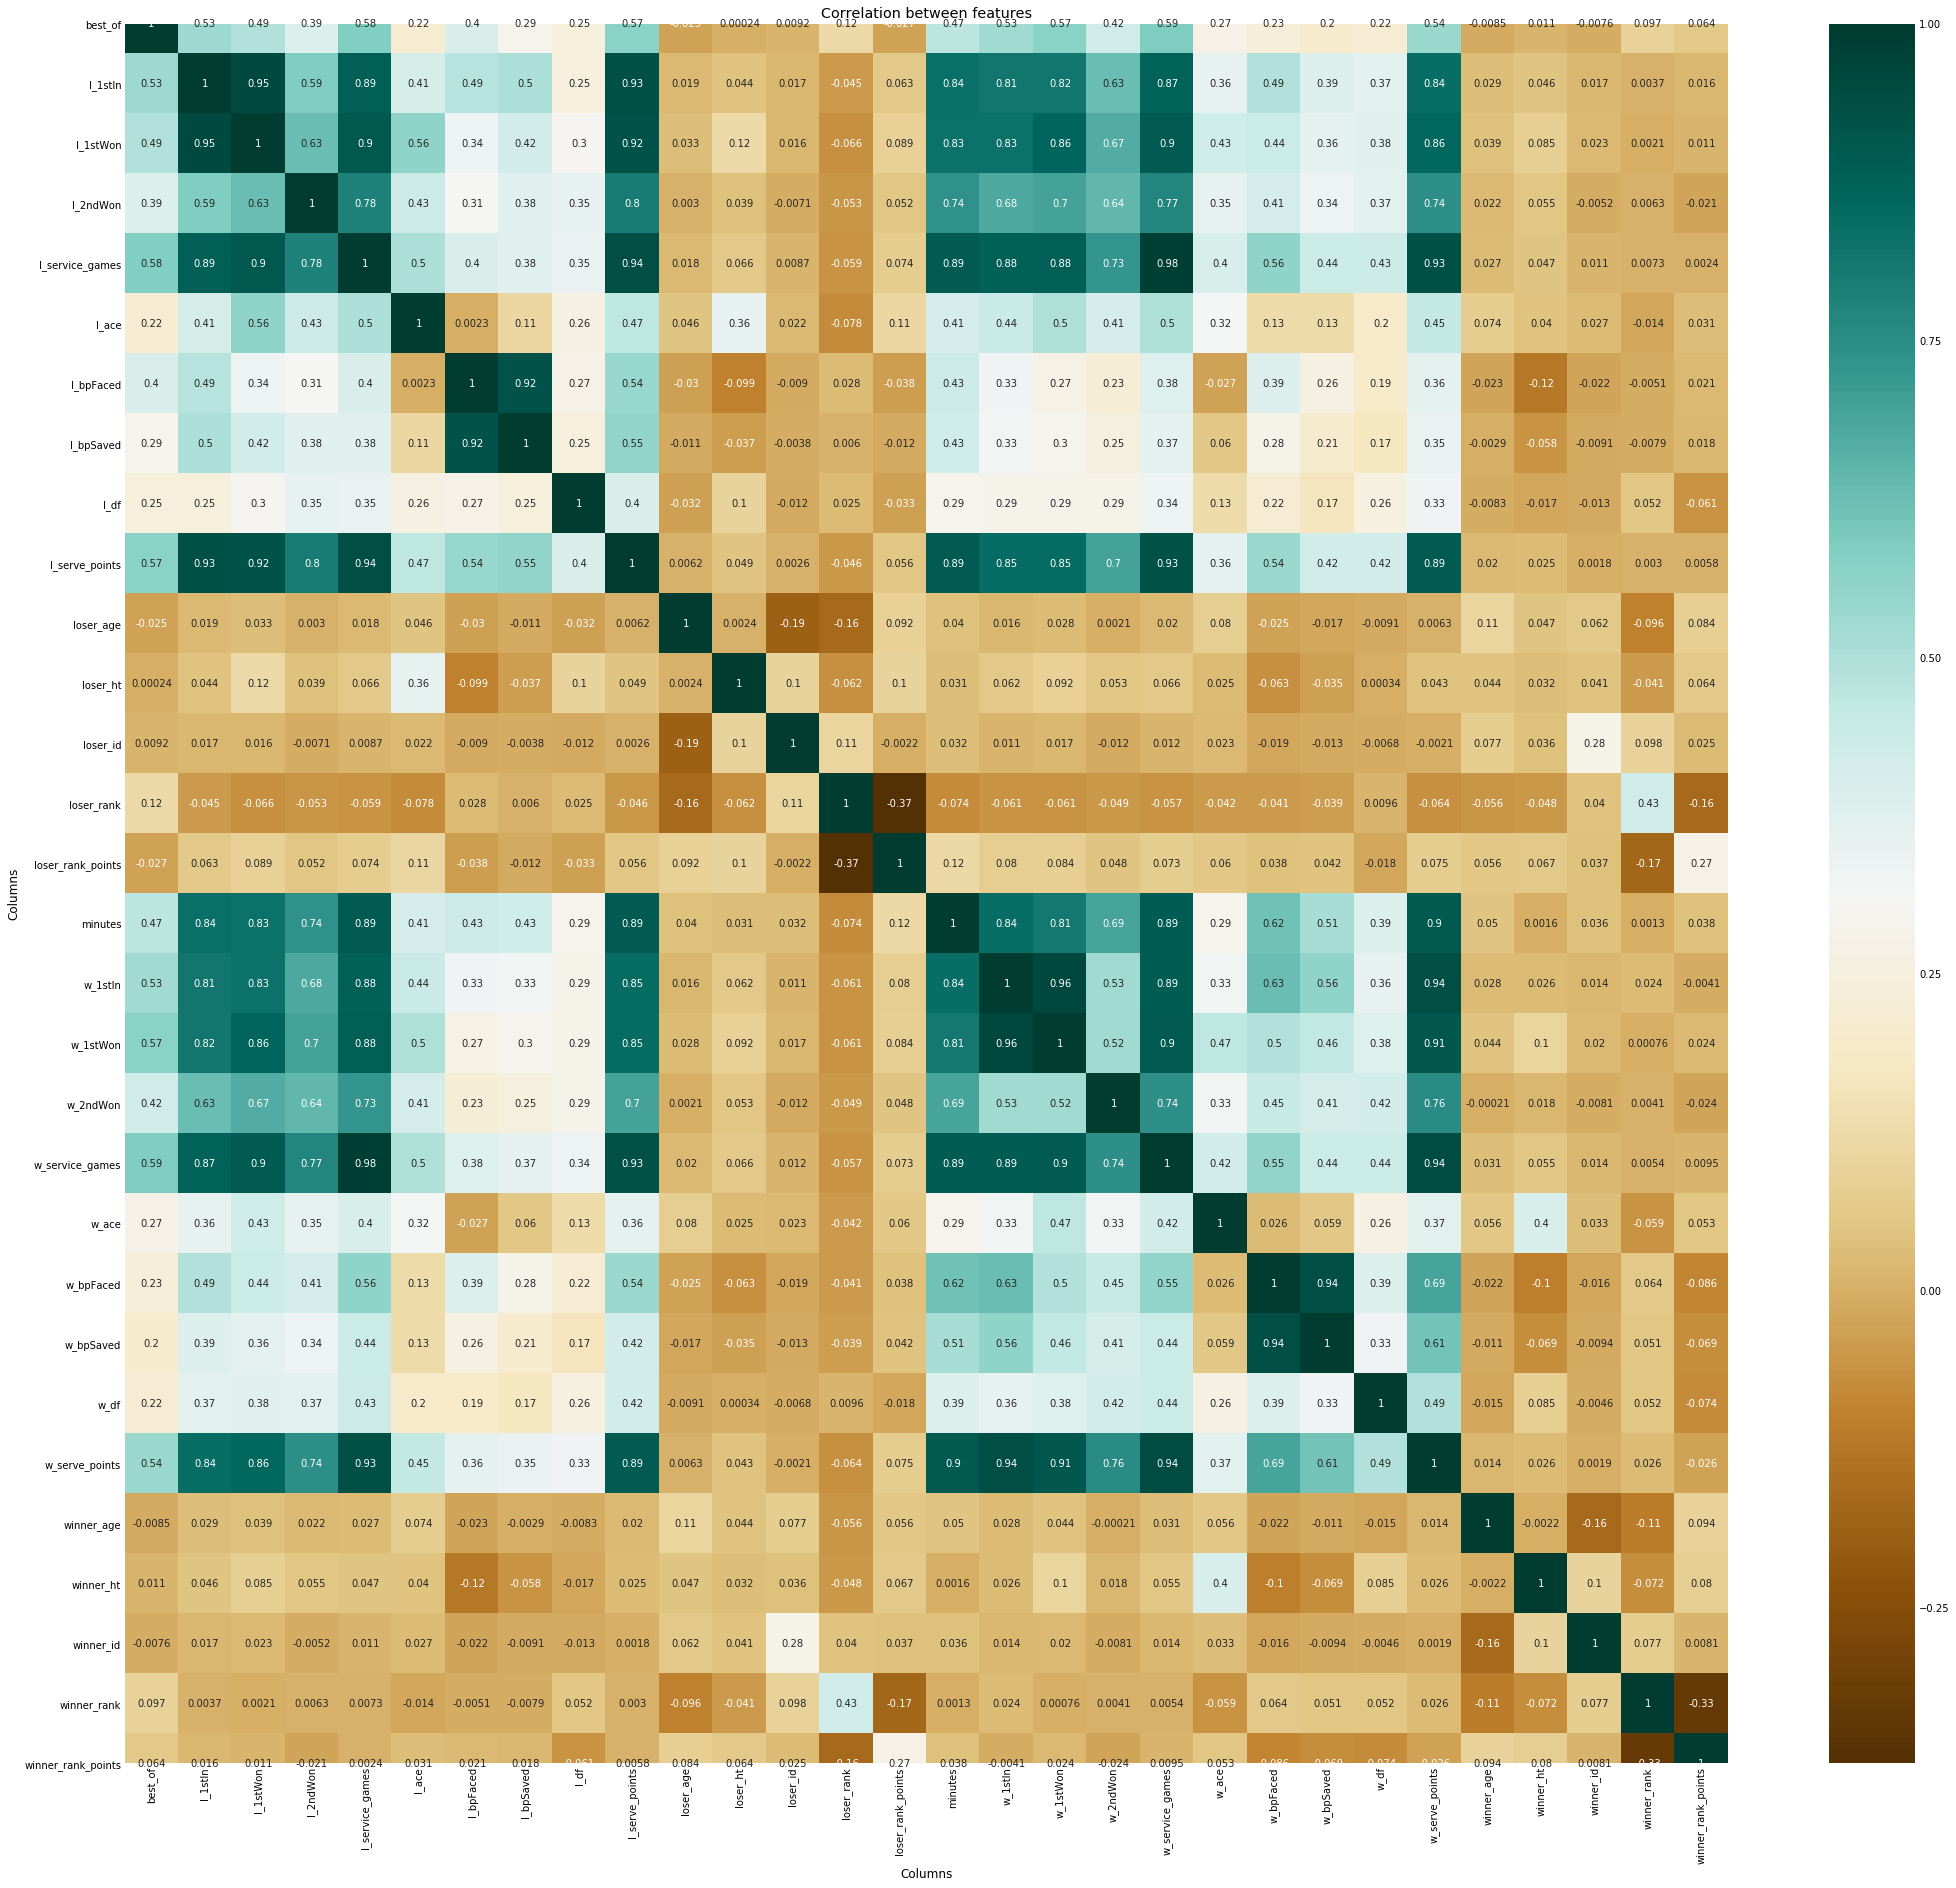

In [14]:
fig, ax = plt.subplots(figsize=(32,32)) 
sns.heatmap(matches.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Correlation between features', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

That's pretty cool.

Seems like players' ranking doesn't matter too much in tennis (correlation between those are 0.4 only). Age also doesn't matter too much!

Serve stats influence other serve stats, not much more I can see from there!

Now I want to see the correlation between some specific features

In [15]:
# alt.data_transformers.disable_max_rows()

# alt.Chart(matches).mark_circle().encode(
#     alt.X(alt.repeat("column"), type='quantitative'),
#     alt.Y(alt.repeat("row"), type='quantitative')
# #     color='Region:N'
# ).properties(
#     width=150,
#     height=150
# ).repeat(
#     row=['loser_age', 'winner_age', 'loser_rank', 'winner rank', 'l_1st_won', "w_1st_won", 'l_ace', "w_ace"],
#     column=['loser_age', 'winner_age', 'loser_rank', 'winner rank', 'l_1st_won', "w_1st_won", 'l_ace', "w_ace"]
# ).interactive()

Altair doesn't work if the number of rows are more than 4000, sadly :). When I disable the max row limit my computer screams at me so I'll just not get into that!

I'm going to try another plot then. Seaborn seems to be the way to go! And it looks super nice! 

I would say this is gonna take *QUITE* a while, though.

C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


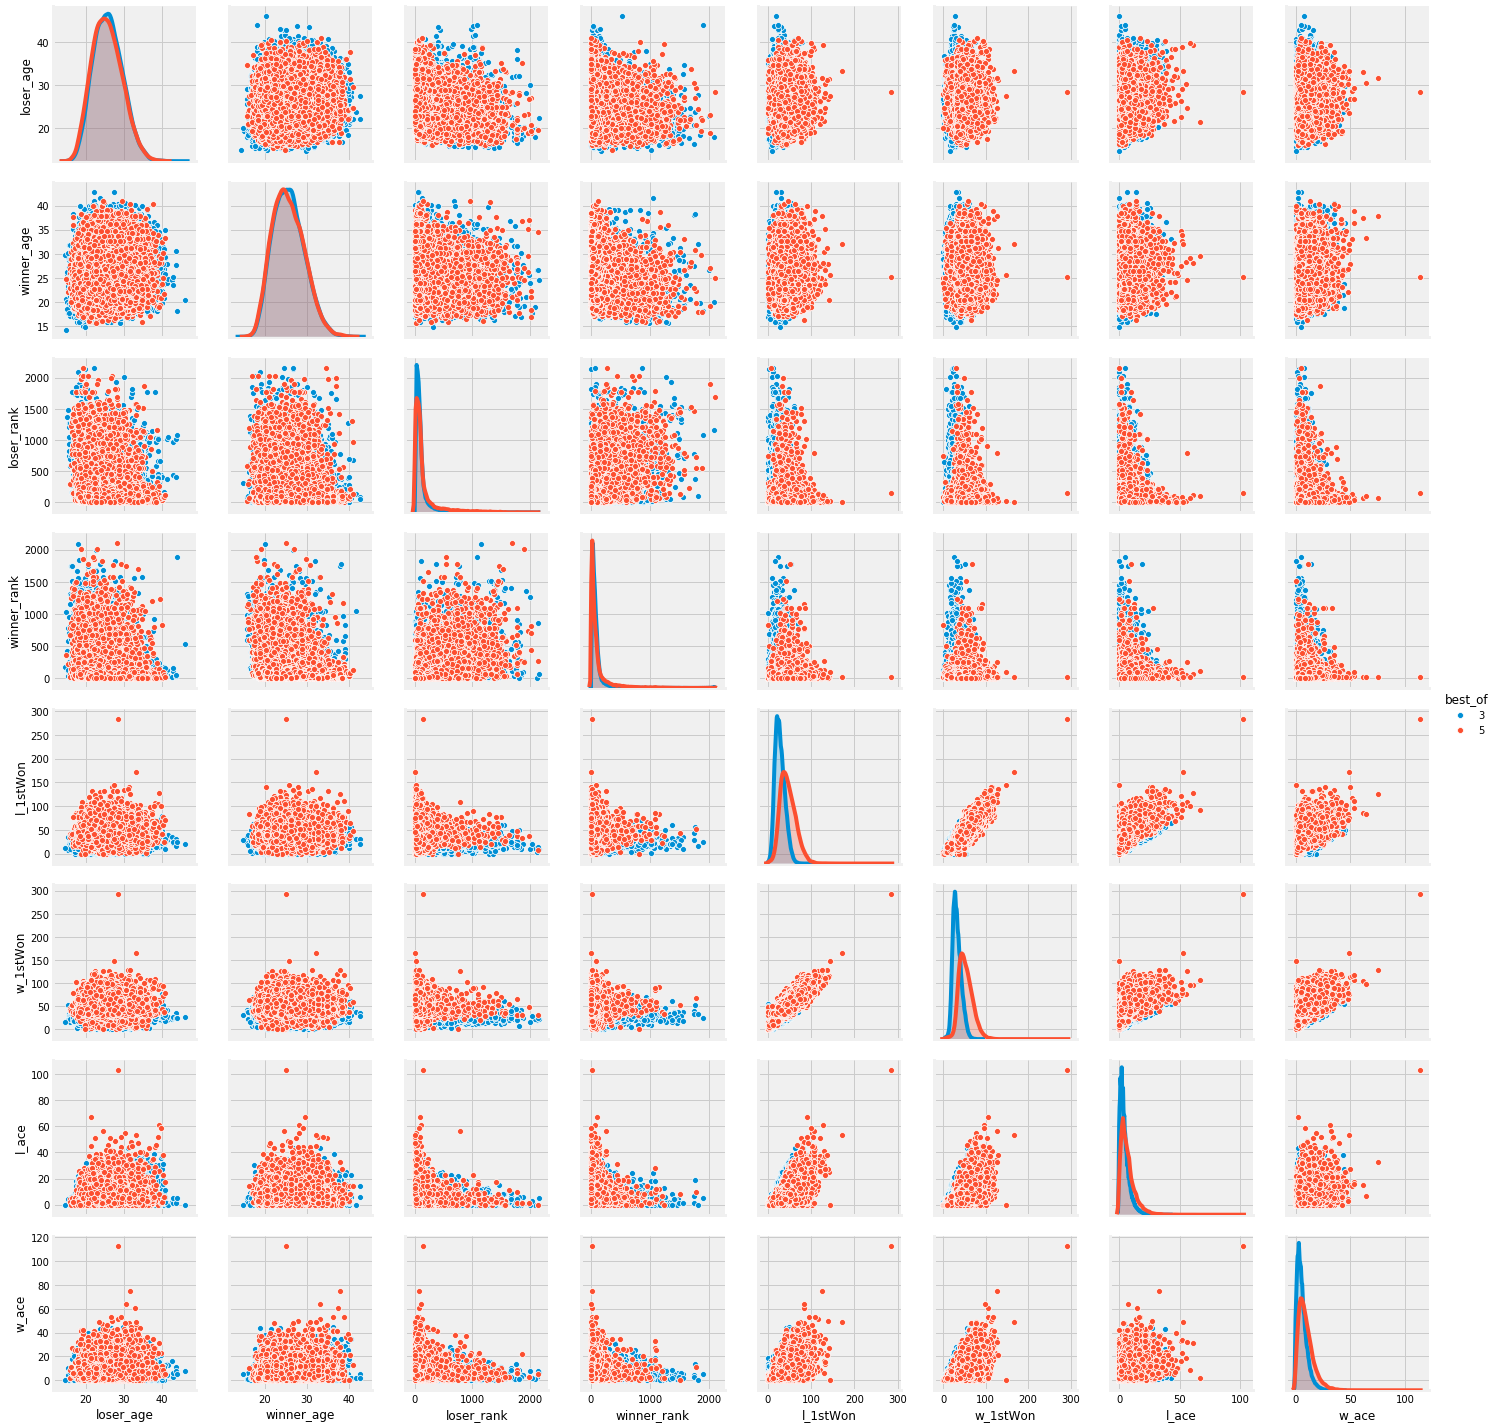

In [16]:
sns.pairplot(matches, hue="best_of", vars = ['loser_age', 'winner_age', 'loser_rank', 'winner_rank', 'l_1stWon', "w_1stWon", 'l_ace', "w_ace"])

What about the same thing for each type of tournament?

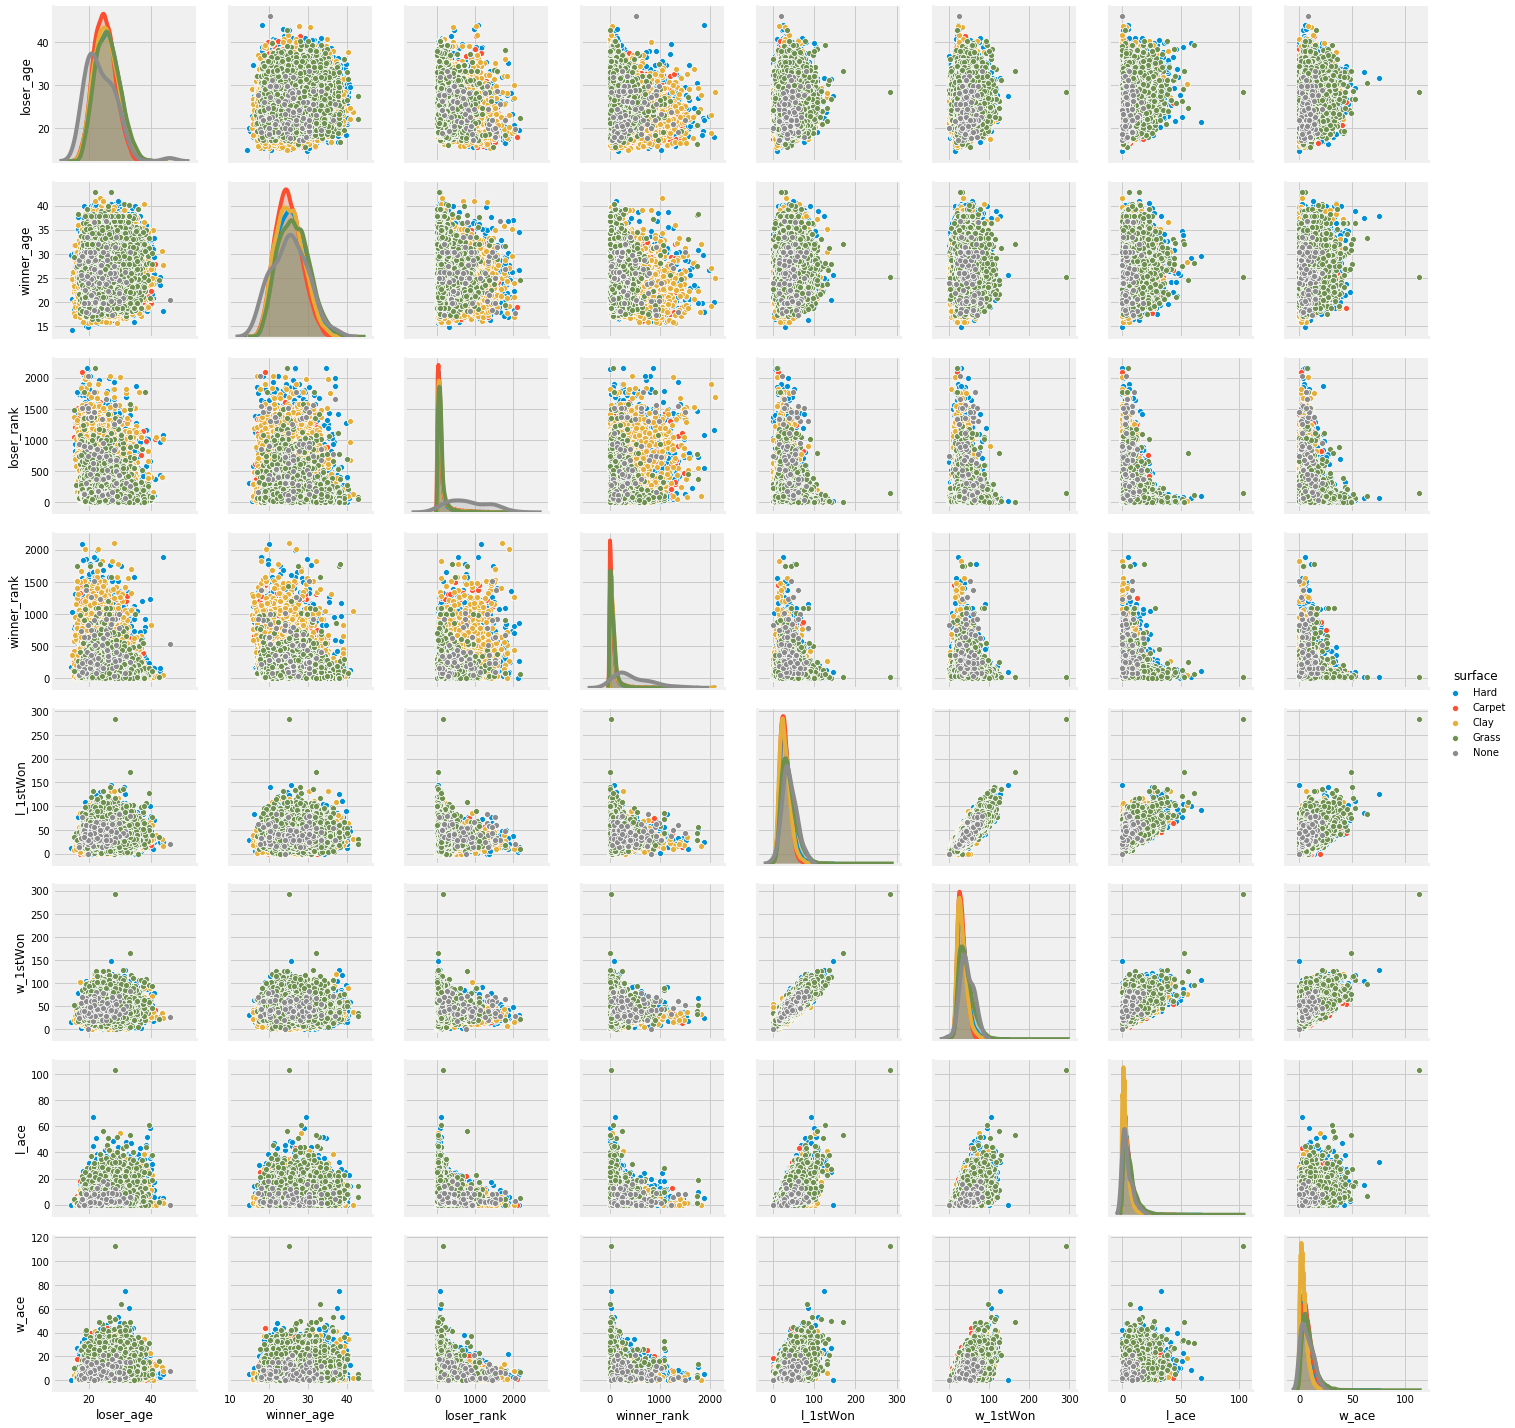

In [17]:
sns.pairplot(matches, hue="surface", vars = ['loser_age', 'winner_age', 'loser_rank', 'winner_rank', 'l_1stWon', "w_1stWon", 'l_ace', "w_ace"])

I can't really tell much from this graph. Maybe if I do something more specific? Round-by-round analysis of Grand Slam tournaments?

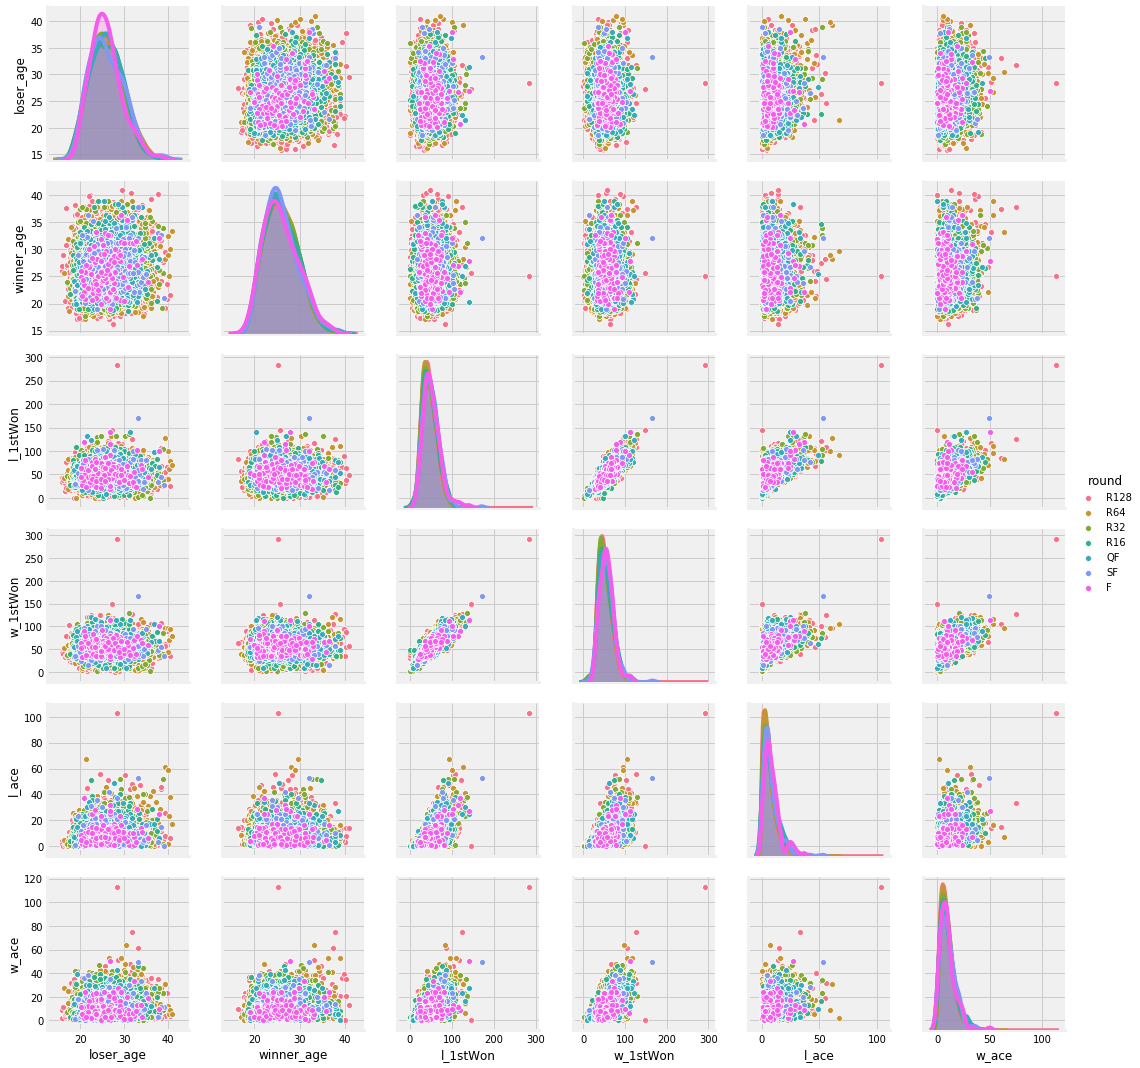

In [18]:
sns.pairplot(matches[matches['tourney_level'] == "G"], hue="round", vars = ['loser_age', 'winner_age', 'l_1stWon', "w_1stWon", 'l_ace', "w_ace"])

Not too different.... but it looks cool though :)

## Got all the matches. What about the players data?

I want to visuallize all players that ever played tennis on the world map!

In [19]:
all_players = df = pd.read_csv(dirname + '/atp_players.csv',
                         index_col=False,
                         header=0,
                         encoding = "ISO-8859-1",
                         names = ['id', 'first_name', 'last_name', "hand", "DOB", "country"],
                         dtype = {'country': str})
all_players['country'] = all_players['country'].replace(np.nan, '', regex=True)
all_players

id      first_name     last_name hand         DOB country
0      100002          Pancho        Segura    R  19210620.0     ECU
1      100003           Frank       Sedgman    R  19271002.0     AUS
2      100004        Giuseppe         Merlo    R  19271011.0     ITA
3      100005  Richard Pancho      Gonzales    R  19280509.0     USA
4      100006           Grant        Golden    R  19290821.0     USA
...       ...             ...           ...  ...         ...     ...
54932  209899            Ilia       Simakin    U         NaN     RUS
54933  209900           Oscar  Galimardanov    U         NaN     RUS
54934  209901       Alexander        Stepin    U         NaN     RUS
54935  209902            Igor        Trunov    U         NaN     RUS
54936  209903           Lukas      Neumayer    U         NaN     AUT

[54937 rows x 6 columns]

In [20]:
all_players.iloc[54479]

id             209446
first_name    Unknown
last_name     Seymour
hand                U
DOB               NaN
country              
Name: 54479, dtype: object

In [21]:
all_players['full_name'] = all_players['first_name'] + " " + all_players['last_name']
all_players

id      first_name     last_name hand         DOB country  \
0      100002          Pancho        Segura    R  19210620.0     ECU   
1      100003           Frank       Sedgman    R  19271002.0     AUS   
2      100004        Giuseppe         Merlo    R  19271011.0     ITA   
3      100005  Richard Pancho      Gonzales    R  19280509.0     USA   
4      100006           Grant        Golden    R  19290821.0     USA   
...       ...             ...           ...  ...         ...     ...   
54932  209899            Ilia       Simakin    U         NaN     RUS   
54933  209900           Oscar  Galimardanov    U         NaN     RUS   
54934  209901       Alexander        Stepin    U         NaN     RUS   
54935  209902            Igor        Trunov    U         NaN     RUS   
54936  209903           Lukas      Neumayer    U         NaN     AUT   

                     full_name  
0                Pancho Segura  
1                Frank Sedgman  
2               Giuseppe Merlo  
3      Richard Pancho Gonzales  
4                 Grant Golden  
...                        ...  
54932             Ilia Simakin  
54933       Oscar Galimardanov  
54934         Alexander Stepin  
54935              Igor Trunov  
54936           Lukas Neumayer  

[54937 rows x 7 columns]

In [22]:
#get country code
import pycountry

list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]  

def country_flag(df):
    if (len(df['country'])==2 and df['country'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['country']).name
    elif (len(df['country'])==3 and df['country'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['country']).name
    else:
        return 'Invalid Code'

all_players['country_name']=all_players.apply(country_flag, axis = 1) 

In [23]:
invalid_code = all_players[all_players['country_name'] == "Invalid Code"]
invalid_code['country'].nunique()

96

In [24]:
invalid_code['country'].unique()

array(['RSA', 'DEN', 'CHI', 'SUI', 'GER', 'CRO', 'ZIM', 'NED', 'GRE',
       'YUG', 'NGR', 'PUR', 'PAR', 'IRI', 'URU', 'CRC', 'HAI', 'LAT',
       'INA', 'BAH', 'PHI', 'BUL', 'MAS', 'POR', 'TPE', 'AHO', 'ESA',
       'GUA', 'MON', 'SLO', 'TRI', 'ALG', 'LIB', 'KUW', 'MRI', 'UAE',
       'VIE', 'TOG', 'SRI', 'BAR', 'SOL', 'ARU', 'MAD', 'CAM', 'LBA',
       'BUR', 'ZAM', 'BER', 'SIN', 'OMA', 'VAN', 'KSA', 'URS', 'FIJ',
       'SAM', 'BRU', 'UNK', 'NIG', 'ECA', 'BAN', 'CAR', 'CGO', 'RHO',
       'ISV', 'TCH', 'FRG', 'CEY', 'ANZ', 'BRI', 'HAW', 'TAN', 'HON',
       'SCG', 'BOT', 'CAY', 'VIN', 'SUD', 'NCA', 'NMI', 'ANG', 'LES',
       'MYA', 'GUD', 'SEY', 'CAL', 'GRN', 'BIZ', 'ANT', 'ASA', 'MGL',
       'NEP', 'TKS', 'POC', 'MTN', 'ITF', ''], dtype=object)

In [25]:
invalid_code[invalid_code['country'] == "ITF"]
#This is so obviously wrong!

id first_name    last_name hand         DOB country  \
51872  206839    Filippo  Piranomonte    U  20011218.0     ITF   

                 full_name  country_name  
51872  Filippo Piranomonte  Invalid Code

Almost 100 countries with an invalid country code.... I will try to convert all these soon but it's not the best thing to spend time on right now :)

## Rankings?

In [26]:
def readAllRankings(dirname):
    """reads all ranking files"""
    allFiles = glob.glob(dirname + "/atp_rankings_" + "*.csv")
    ranks = pd.DataFrame()
    container = list()
    for filen in allFiles:
        df = pd.read_csv(filen,
                         index_col=None,
                         header=None,
                         encoding = "ISO-8859-1",
                         dtype={"ranking_date": float, "rank": int, "player": int, "points": int})
        container.append(df)
    ranks = pd.concat(container)
    return ranks

In [27]:
readAllRankings(dirname)

C:\Users\Cedric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


0     1       2       3
0      ranking_date  rank  player  points
1          20000110     1  101736    4135
2          20000110     2  102338    2915
3          20000110     3  101948    2419
4          20000110     4  103017    2184
...             ...   ...     ...     ...
17396      20200309   896  105478      14
17397      20200309   897  106396      14
17398      20200309   898  207408      14
17399      20200309   899  207968      14
17400      20200309   900  132741      14

[2857085 rows x 4 columns]

# Main Course: Player Modelling

First, I need to build a portfolio of matches for all players in the list. This is quite a monumental task.I'll also limit my players list to people who had at one point been in top 100 only, since it's a pretty decent cut off to show quality of players. NextGen players are pretty good, after all.

In [110]:
#Filter out players who have at one point been in top 200. Only show matches where one player was been in top 200.
modeling_matches = matches[(matches['loser_rank'] <= 200) | (matches['winner_rank'] <= 200)]
modeling_matches

best_of  l_1stIn  l_1stWon  l_2ndWon  l_service_games  l_ace  l_bpFaced  \
62         3     30.0      17.0       7.0              8.0    3.0        6.0   
63         3     30.0      22.0       6.0              8.0    4.0       11.0   
64         3     43.0      24.0      14.0             11.0    1.0        8.0   
65         3     61.0      38.0      15.0             13.0    3.0       12.0   
66         3     25.0      21.0      12.0              9.0    1.0        6.0   
..       ...      ...       ...       ...              ...    ...        ...   
727        3      NaN       NaN       NaN              NaN    NaN        NaN   
728        3      NaN       NaN       NaN              NaN    NaN        NaN   
729        3      NaN       NaN       NaN              NaN    NaN        NaN   
737        3      NaN       NaN       NaN              NaN    NaN        NaN   
739        3      NaN       NaN       NaN              NaN    NaN        NaN   

     l_bpSaved  l_df  l_serve_points  loser_age loser_entry loser_hand  \
62         2.0   0.0            46.0  20.643395         NaN          R   
63         7.0   7.0            56.0  31.816564          WC          R   
64         4.0   3.0            68.0  21.697467          WC          R   
65         8.0   2.0            96.0  23.854894         NaN          L   
66         4.0   3.0            49.0  20.695414         NaN          R   
..         ...   ...             ...        ...         ...        ...   
727        NaN   NaN             NaN        NaN         NaN          U   
728        NaN   NaN             NaN  28.898015         NaN          R   
729        NaN   NaN             NaN  29.451061         NaN          R   
737        NaN   NaN             NaN  20.791239         NaN          R   
739        NaN   NaN             NaN  26.932238         NaN          R   

     loser_ht  loser_id loser_ioc             loser_name  loser_rank  \
62      175.0    101746       ITA           Renzo Furlan        78.0   
63      188.0    100587       NZL              Steve Guy       220.0   
64      185.0    101601       NZL           Brett Steven       212.0   
65      173.0    101332       ISR            Gilad Bloom        72.0   
66      196.0    101735       AUS       Richard Fromberg        28.0   
..        ...       ...       ...                    ...         ...   
727       NaN    209866       LVA         Karlis Ozolins         NaN   
728       NaN    105747       EGY  Karim Mohamed Maamoun       390.0   
729     183.0    105633       EGY         Mohamed Safwat       131.0   
737       NaN    202165       PHI            Alberto Lim         NaN   
739       NaN    106150       PHI        Jeson Patrombon      1421.0   

     loser_rank_points loser_seed  minutes round        score surface  \
62               459.0        NaN     63.0   R32      6-4 6-1    Hard   
63               114.0        NaN     72.0   R32      6-3 6-2    Hard   
64               116.0        NaN    101.0   R32  2-6 6-1 6-2    Hard   
65               483.0          8    108.0   R32  6-3 1-6 6-4    Hard   
66               876.0          3     65.0   R32      6-3 6-4    Hard   
..                 ...        ...      ...   ...          ...     ...   
727                NaN        NaN      NaN    RR   7-6(9) 7-5    Hard   
728               90.0        NaN      NaN    RR      6-4 6-3    Hard   
729              407.0        NaN      NaN    RR      6-2 6-4    Hard   
737                NaN        NaN      NaN    RR      6-2 6-1    Clay   
739                2.0        NaN      NaN    RR      6-2 6-1    Clay   

    tourney_date                        tourney_id tourney_level  \
62    1991-01-07                          1991-301             A   
63    1991-01-07                          1991-301             A   
64    1991-01-07                          1991-301             A   
65    1991-01-07                          1991-301             A   
66    1991-01-07                          1991-301             A   
..   

In [29]:
#Find all top 100 players playing after the 90s.
losers_list = (modeling_matches[modeling_matches['loser_rank'] <= 200])['loser_id'].unique()
winners_list= (modeling_matches[modeling_matches['winner_rank'] <= 200])['winner_id'].unique()
player_list = np.concatenate((losers_list, winners_list), axis=0)

player_list = np.unique(player_list)
len(player_list)

1126

In [30]:
type(player_list[0])

numpy.int64

In [31]:
def matches_with_player(id):
    individual_matches = matches[(matches['winner_id'] == id) | (matches['loser_id'] == id)]
    return individual_matches

In [32]:
individual_list = []                  
for players in player_list:
    df = matches_with_player(players)
    df['id'] = players
    individual_list.append(df)

In [33]:
individual_list[2]

best_of  l_1stIn  l_1stWon  l_2ndWon  l_service_games  l_ace  l_bpFaced  \
181         5     64.0      29.0       5.0             12.0    0.0       15.0   
990         3    123.0      74.0       6.0             17.0    1.0        9.0   
2497        3     42.0      15.0       4.0              8.0    0.0       13.0   

      l_bpSaved  l_df  l_serve_points  loser_age loser_entry loser_hand  \
181         7.0   1.0            79.0  32.725530         NaN          R   
990         5.0   0.0           135.0  32.955510         NaN          R   
2497        6.0   0.0            54.0  33.262149         NaN          R   

      loser_ht  loser_id loser_ioc     loser_name  loser_rank  \
181      175.0    100536       ESP  Fernando Luna       111.0   
990      175.0    100536       ESP  Fernando Luna       127.0   
2497     175.0    100536       ESP  Fernando Luna       223.0   

      loser_rank_points loser_seed  minutes round              score surface  \
181               310.0        NaN     85.0  R128        6-1 6-3 6-2    Hard   
990               284.0        NaN    170.0   R64  7-6(6) 6-7(3) 6-4    Clay   
2497              119.0        NaN     75.0   R32            6-2 6-1    Clay   

     tourney_date tourney_id tourney_level     tourney_name  w_1stIn  \
181    1991-01-14   1991-580             G  Australian Open     38.0   
990    1991-04-08   1991-425             A        Barcelona     95.0   
2497   1991-07-29   1991-475             A       San Marino     40.0   

      w_1stWon  w_2ndWon  w_service_games  w_ace  w_bpFaced  w_bpSaved  w_df  \
181       31.0      17.0             12.0    1.0        6.0        4.0   4.0   
990       67.0      20.0             17.0    5.0       23.0       20.0   5.0   
2497      21.0       6.0              7.0    0.0        5.0        3.0   0.0   

      w_serve_points  winner_age winner_entry winner_hand  winner_ht  \
181             73.0   19.331964            Q           R      185.0   
990            144.0   24.098563          NaN           L      188.0   
2497            49.0   22.754278          NaN           R      168.0   

      winner_id winner_ioc       winner_name  winner_rank  winner_rank_points  \
181      101965        RSA    Wayne Ferreira        173.0               165.0   
990      101334        RUS  Alexander Volkov         26.0               992.0   
2497     101534        CZE     Libor Nemecek        208.0               143.0   

     winner_seed      id  
181          NaN  100536  
990           13  100536  
2497         NaN  100536

In [34]:
len(individual_list)

1126

So we now have 1126 players in our list!

In [35]:
player_db = pd.concat(individual_list)

In [36]:
player_db

best_of  l_1stIn  l_1stWon  l_2ndWon  l_service_games  l_ace  l_bpFaced  \
592         3     33.0      13.0       3.0              7.0    0.0        7.0   
745         3     33.0      21.0      13.0             10.0    3.0       11.0   
777         3     33.0      15.0       8.0              9.0    0.0        7.0   
947         3     36.0      21.0       8.0              8.0    0.0        9.0   
1031        3     32.0      20.0      15.0             11.0    5.0       13.0   
...       ...      ...       ...       ...              ...    ...        ...   
434         3     68.0      54.0      21.0             17.0    9.0        7.0   
441         3     59.0      36.0      21.0             12.0    6.0        8.0   
454         3      NaN       NaN       NaN              NaN    NaN        NaN   
498         3     41.0      24.0      12.0             11.0    1.0        7.0   
506         3     38.0      25.0      20.0             11.0    4.0        3.0   

      l_bpSaved  l_df  l_serve_points  loser_age loser_entry loser_hand  \
592         2.0   1.0            41.0  38.480493          WC          L   
745         5.0   4.0            70.0  24.618754         NaN          R   
777         2.0   3.0            50.0  38.518823          WC          L   
947         5.0   1.0            55.0  38.576318          WC          L   
1031        7.0   3.0            68.0  27.170431           Q          R   
...         ...   ...             ...        ...         ...        ...   
434         5.0   1.0           113.0  18.485969          WC          U   
441         5.0   7.0           101.0  29.177276         NaN          R   
454         NaN   NaN             NaN  30.247775         NaN          R   
498         3.0   1.0            67.0  18.505133         NaN          U   
506         2.0   0.0            71.0  29.514031           Q          R   

      loser_ht  loser_id loser_ioc      loser_name  loser_rank  \
592      178.0    100284       USA   Jimmy Connors       990.0   
745      185.0    101274       GER   Udo Riglewski        98.0   
777      178.0    100284       USA   Jimmy Connors       961.0   
947      178.0    100284       USA   Jimmy Connors       590.0   
1031     193.0    101004       USA        Jim Pugh       158.0   
...        ...       ...       ...             ...         ...   
434        NaN    206173       ITA   Jannik Sinner        79.0   
441      163.0    105676       BEL    David Goffin        10.0   
454        NaN    105430       MDA      Radu Albot        50.0   
498        NaN    206173       ITA   Jannik Sinner        68.0   
506        NaN    105613       SVK  Norbert Gombos       102.0   

      loser_rank_points loser_seed  minutes round           score surface  \
592                 2.0        NaN     58.0   R32         6-3 6-0  Carpet   
745               364.0        NaN    107.0  R128         6-4 6-4    Hard   
777                 3.0        NaN     80.0   R64         6-4 6-3    Hard   
947                15.0        NaN     71.0   R32         6-1 6-4    Hard   
1031              191.0        NaN    115.0   R64     1-6 6-4 6-0    Hard   
...                 ...        ...      ...   ...             ...     ...   
434               710.0        NaN    164.0    QF  7-5 3-6 7-6(6)    Hard   
441              2600.0          4    119.0   R16      7-6(7) 7-5    Hard   
454               977.0        NaN      0.0   R32             W/O    Hard   
498               793.0        NaN     79.0   R16     1-6 6-1 6-2    Hard   
506               565.0        NaN    123.0   R32      6-4 7-6(5)    Hard   

     tourney_date tourney_id tourney_level   tourney_name  w_1stIn  w_1stWon  \
592    1991-02-25   1991-411             A        Chicago     33.0      24.0   
745    1991-03-15   1991-403             M  Miami Masters     47.0      27.0   
777    1991-03-15   1991-403             M  Miami Masters     43.0      25.0   
947    1991-04-01   1991-409             A        Orlando     26.0      20.0   
1031   1991-04

In [37]:
player_db[player_db['id'] == 100284]

best_of  l_1stIn  l_1stWon  l_2ndWon  l_service_games  l_ace  l_bpFaced  \
592         3     33.0      13.0       3.0              7.0    0.0        7.0   
745         3     33.0      21.0      13.0             10.0    3.0       11.0   
777         3     33.0      15.0       8.0              9.0    0.0        7.0   
947         3     36.0      21.0       8.0              8.0    0.0        9.0   
1031        3     32.0      20.0      15.0             11.0    5.0       13.0   
...       ...      ...       ...       ...              ...    ...        ...   
1977        3     37.0      30.0      11.0             11.0   14.0        6.0   
1988        3     25.0      19.0      15.0              9.0    6.0        6.0   
1994        3     51.0      35.0       9.0             10.0    2.0        9.0   
2554        3     45.0      23.0       9.0             10.0    1.0        4.0   
1427        3     55.0      30.0      18.0             12.0    3.0       11.0   

      l_bpSaved  l_df  l_serve_points  loser_age loser_entry loser_hand  \
592         2.0   1.0            41.0  38.480493          WC          L   
745         5.0   4.0            70.0  24.618754         NaN          R   
777         2.0   3.0            50.0  38.518823          WC          L   
947         5.0   1.0            55.0  38.576318          WC          L   
1031        7.0   3.0            68.0  27.170431           Q          R   
...         ...   ...             ...        ...         ...        ...   
1977        3.0   7.0            67.0  22.143737         NaN          R   
1988        2.0  11.0            64.0  27.362081         NaN          R   
1994        7.0   2.0            78.0  42.792608          WC          L   
2554        0.0   0.0            56.0  42.907598          WC          L   
1427        6.0   2.0            93.0  43.655031          WC          L   

      loser_ht  loser_id loser_ioc        loser_name  loser_rank  \
592      178.0    100284       USA     Jimmy Connors       990.0   
745      185.0    101274       GER     Udo Riglewski        98.0   
777      178.0    100284       USA     Jimmy Connors       961.0   
947      178.0    100284       USA     Jimmy Connors       590.0   
1031     193.0    101004       USA          Jim Pugh       158.0   
...        ...       ...       ...               ...         ...   
1977     183.0    102205       CAN  Sebastien Lareau        81.0   
1988     180.0    101441       GER     Martin Sinner        49.0   
1994     178.0    100284       USA     Jimmy Connors         NaN   
2554     178.0    100284       USA     Jimmy Connors       431.0   
1427     178.0    100284       USA     Jimmy Connors       413.0   

      loser_rank_points loser_seed  minutes round        score surface  \
592                 2.0        NaN     58.0   R32      6-3 6-0  Carpet   
745               364.0        NaN    107.0  R128      6-4 6-4    Hard   
777                 3.0        NaN     80.0   R64      6-4 6-3    Hard   
947                15.0        NaN     71.0   R32      6-1 6-4    Hard   
1031              191.0        NaN    115.0   R64  1-6 6-4 6-0    Hard   
...                 ...        ...      ...   ...          ...     ...   
1977              551.0        NaN     99.0   R32   6-4 7-6(2)   Grass   
1988              746.0        NaN     89.0   R16   7-6(9) 6-0   Grass   
1994                NaN        NaN    101.0    QF   7-6(3) 6-3   Grass   
2554               58.0        NaN     68.0   R32      6-4 6-4    Hard   
1427               59.0        NaN    118.0   R32  6-2 3-6 6-1    Clay   

     tourney_date tourney_id tourney_level   tourney_name  w_1stIn  w_1stWon  \
592    1991-02-25   1991-411             A        Chicago     33.0      24.0   
745    1991-03-15   1991-403             M  Miami Masters     47.0      27.0   
777    1991-03-15   1991-403             M  Miami Masters     43.0      25.0   
947    1991-04-01   1991-409             A        Orlando     26.0      20.0   
1031   1991-04-08   1991-3

In [38]:
#Need to have the same stats for the players, can't just base on the l and w columns
loser_db = player_db[player_db['id'] == player_db['loser_id']]
loser_db.drop(loser_db.iloc[:,28:41], inplace = True, axis = 1)
loser_db['outcome'] = 0
loser_db.columns = ['best_of',  '1stIn', '1stWon', '2ndWon',  'service_games',  'ace',  'bpFaced',  'bpSaved',  
                    'df',  'serve_points',  'age',  'entry',  'hand',  'ht',  'player_id',  'ioc',  'name',  'rank',  
                    'rank_points',  'seed',  'minutes',  'round',  'score',  'surface',  'tourney_date',  'tourney_id',  
                    'tourney_level',  'tourney_name',  'opponent_id',  'opponent_ioc',  'opponent_name',  'opponent_rank',  
                    'opponent_rank_points',  'opponent_seed',  'id', 'outcome']

loser_db.drop(['player_id'], inplace = True, axis = 1)

In [39]:
winner_db = player_db[player_db['id'] == player_db['winner_id']]
winner_db.drop(winner_db.iloc[:,1:14], inplace = True, axis = 1)
winner_db['outcome'] = 1
winner_db.columns = ['best_of', 'opponent_id',  'opponent_ioc',  'opponent_name',  'opponent_rank',  
                    'opponent_rank_points',  'opponent_seed', 'minutes',  'round',  'score',  'surface',  'tourney_date',  'tourney_id',  
                    'tourney_level',  'tourney_name', '1stIn', '1stWon', '2ndWon',  'service_games',  'ace',  'bpFaced',  'bpSaved',  
                    'df',  'serve_points',  'age',  'entry',  'hand',  'ht',  'player_id',  'ioc',  'name',  'rank',  
                    'rank_points',  'seed', 'id', 'outcome']

winner_db.drop(['player_id'], inplace = True, axis = 1)

In [40]:
player_db = pd.concat([loser_db, winner_db], sort=False)
player_db

best_of  1stIn  1stWon  2ndWon  service_games  ace  bpFaced  bpSaved  \
592         3   33.0    13.0     3.0            7.0  0.0      7.0      2.0   
777         3   33.0    15.0     8.0            9.0  0.0      7.0      2.0   
947         3   36.0    21.0     8.0            8.0  0.0      9.0      5.0   
1070        3   71.0    36.0    13.0           14.0  1.0     16.0      8.0   
1238        3   58.0    38.0    12.0           13.0  0.0      8.0      4.0   
...       ...    ...     ...     ...            ...  ...      ...      ...   
2541        3   44.0    34.0    14.0           10.0  7.0      8.0      7.0   
208         5   53.0    42.0    20.0           15.0  2.0      6.0      4.0   
441         3   53.0    38.0    16.0           12.0  5.0      8.0      6.0   
454         3    NaN     NaN     NaN            NaN  NaN      NaN      NaN   
506         3   46.0    36.0    20.0           11.0  9.0      6.0      6.0   

       df  serve_points        age entry hand     ht  ioc           name  \
592   1.0          41.0  38.480493    WC    L  178.0  USA  Jimmy Connors   
777   3.0          50.0  38.518823    WC    L  178.0  USA  Jimmy Connors   
947   1.0          55.0  38.576318    WC    L  178.0  USA  Jimmy Connors   
1070  1.0          97.0  38.595483    WC    L  178.0  USA  Jimmy Connors   
1238  2.0          85.0  38.652977    WC    L  178.0  USA  Jimmy Connors   
...   ...           ...        ...   ...  ...    ...  ...            ...   
2541  1.0          74.0  18.179329    WC    U    NaN  ITA  Jannik Sinner   
208   1.0          91.0  18.428474   NaN    U    NaN  ITA  Jannik Sinner   
441   0.0          82.0  18.485969    WC    U    NaN  ITA  Jannik Sinner   
454   NaN           NaN  18.485969    WC    U    NaN  ITA  Jannik Sinner   
506   2.0          84.0  18.505133   NaN    U    NaN  ITA  Jannik Sinner   

       rank  rank_points seed  minutes round           score surface  \
592   990.0          2.0  NaN     58.0   R32         6-3 6-0  Carpet   
777   961.0          3.0  NaN     80.0   R64         6-4 6-3    Hard   
947   590.0         15.0  NaN     71.0   R32         6-1 6-4    Hard   
1070  577.0         16.0  NaN    161.0   R16  6-4 6-7(5) 6-1    Hard   
1238  318.0         58.0  NaN    125.0   R32  7-6(6) 1-6 6-1    Clay   
...     ...          ...  ...      ...   ...             ...     ...   
2541  101.0        554.0  NaN     90.0   R32         6-3 6-4    Hard   
208    82.0        671.0  NaN    139.0  R128  7-6(2) 6-2 6-4    Hard   
441    79.0        710.0  NaN    119.0   R16      7-6(7) 7-5    Hard   
454    79.0        710.0  NaN      0.0   R32             W/O    Hard   
506    68.0        793.0  NaN    123.0   R32      6-4 7-6(5)    Hard   

     tourney_date tourney_id tourney_level     tourney_name  opponent_id  \
592    1991-02-25   1991-411             A          Chicago       101409   
777    1991-03-15   1991-403             M    Miami Masters       101750   
947    1991-04-01   1991-409             A          Orlando       101196   
1070   1991-04-08   1991-329             A    Tokyo Outdoor       101222   
1238   1991-04-29   1991-309             A           Madrid       100652   
...           ...        ...           ...              ...          ...   
2541   2019-10-21  2019-0337             A           Vienna       104259   
208    2020-01-20   2020-580             G  Australian Open       126845   
441    2020-02-10  2020-0407             A        Rotterdam       105676   
454    2020-02-10  2020-0407             A        Rotterdam       105430   
506    2020-02-17  2020-0496             A        Marseille       105613   

     opponent_ioc          opponent_name  opponent_rank  opponent_rank_points  \
592           PER            Jaime Yzaga           65.0                 502.0   
777           ITA      Cristiano Caratti           37.0                 767.0   
947           USA       Derrick Rostagno           27.0                 923.0   
1070          SWE          Stefan Edberg            1.

In [41]:
#convert serve stats to %
player_db['1st_in_percent'] = player_db['1stIn'] / player_db['serve_points']
player_db['1st_won_percent'] = player_db['1stWon'] / player_db['1stIn']
player_db['2nd_won_percent'] = player_db['2ndWon'] / (  player_db['serve_points'] - player_db['1stIn'])
player_db['ace_percent'] = player_db['ace'] / player_db['serve_points']
player_db

best_of  1stIn  1stWon  2ndWon  service_games  ace  bpFaced  bpSaved  \
592         3   33.0    13.0     3.0            7.0  0.0      7.0      2.0   
777         3   33.0    15.0     8.0            9.0  0.0      7.0      2.0   
947         3   36.0    21.0     8.0            8.0  0.0      9.0      5.0   
1070        3   71.0    36.0    13.0           14.0  1.0     16.0      8.0   
1238        3   58.0    38.0    12.0           13.0  0.0      8.0      4.0   
...       ...    ...     ...     ...            ...  ...      ...      ...   
2541        3   44.0    34.0    14.0           10.0  7.0      8.0      7.0   
208         5   53.0    42.0    20.0           15.0  2.0      6.0      4.0   
441         3   53.0    38.0    16.0           12.0  5.0      8.0      6.0   
454         3    NaN     NaN     NaN            NaN  NaN      NaN      NaN   
506         3   46.0    36.0    20.0           11.0  9.0      6.0      6.0   

       df  serve_points        age entry hand     ht  ioc           name  \
592   1.0          41.0  38.480493    WC    L  178.0  USA  Jimmy Connors   
777   3.0          50.0  38.518823    WC    L  178.0  USA  Jimmy Connors   
947   1.0          55.0  38.576318    WC    L  178.0  USA  Jimmy Connors   
1070  1.0          97.0  38.595483    WC    L  178.0  USA  Jimmy Connors   
1238  2.0          85.0  38.652977    WC    L  178.0  USA  Jimmy Connors   
...   ...           ...        ...   ...  ...    ...  ...            ...   
2541  1.0          74.0  18.179329    WC    U    NaN  ITA  Jannik Sinner   
208   1.0          91.0  18.428474   NaN    U    NaN  ITA  Jannik Sinner   
441   0.0          82.0  18.485969    WC    U    NaN  ITA  Jannik Sinner   
454   NaN           NaN  18.485969    WC    U    NaN  ITA  Jannik Sinner   
506   2.0          84.0  18.505133   NaN    U    NaN  ITA  Jannik Sinner   

       rank  rank_points seed  minutes round           score surface  \
592   990.0          2.0  NaN     58.0   R32         6-3 6-0  Carpet   
777   961.0          3.0  NaN     80.0   R64         6-4 6-3    Hard   
947   590.0         15.0  NaN     71.0   R32         6-1 6-4    Hard   
1070  577.0         16.0  NaN    161.0   R16  6-4 6-7(5) 6-1    Hard   
1238  318.0         58.0  NaN    125.0   R32  7-6(6) 1-6 6-1    Clay   
...     ...          ...  ...      ...   ...             ...     ...   
2541  101.0        554.0  NaN     90.0   R32         6-3 6-4    Hard   
208    82.0        671.0  NaN    139.0  R128  7-6(2) 6-2 6-4    Hard   
441    79.0        710.0  NaN    119.0   R16      7-6(7) 7-5    Hard   
454    79.0        710.0  NaN      0.0   R32             W/O    Hard   
506    68.0        793.0  NaN    123.0   R32      6-4 7-6(5)    Hard   

     tourney_date tourney_id tourney_level     tourney_name  opponent_id  \
592    1991-02-25   1991-411             A          Chicago       101409   
777    1991-03-15   1991-403             M    Miami Masters       101750   
947    1991-04-01   1991-409             A          Orlando       101196   
1070   1991-04-08   1991-329             A    Tokyo Outdoor       101222   
1238   1991-04-29   1991-309             A           Madrid       100652   
...           ...        ...           ...              ...          ...   
2541   2019-10-21  2019-0337             A           Vienna       104259   
208    2020-01-20   2020-580             G  Australian Open       126845   
441    2020-02-10  2020-0407             A        Rotterdam       105676   
454    2020-02-10  2020-0407             A        Rotterdam       105430   
506    2020-02-17  2020-0496             A        Marseille       105613   

     opponent_ioc          opponent_name  opponent_rank  opponent_rank_points  \
592           PER            Jaime Yzaga           65.0                 502.0   
777           ITA      Cristiano Caratti           37.0                 767.0   
947           USA       Derrick Rostagno           27.0                 923.0   
1070          SWE          Stefan Edberg            1.

**Defining NextGen players**

Who are amongst the top young tennis player currently? I guess I can define NextGen players as players who have at least competed in the ATP hosted NextGen finals for the last 3 years. I'll also include more players if that doesn't feel sufficient enough.

"Alexandre Zverev",
"Andrey Rublev",
"Karen Khachanov",
"Denis Shapovalov",
"Borna Coric",
"Jared Donaldson",
"Chung Hyeon",
"Daniil Medvedev",
Frances Tiafoe,
Stefanos Tsitispas,
Alex de Minaur,
Taylor Fritz,
Jaume Munar,
Hubert Hurkacz,
Ugo Humbert,
Felix Auger Aliassime,
Casper Ruud,
Miomir Kecmanovic,
Mikael Ymer,
Alejandro Davidovich Fokina,
Jannik Sinner,
Alexei Popyrin

In [42]:
next_gen = ["Alexander Zverev", "Andrey Rublev", "Karen Khachanov", "Denis Shapovalov", "Borna Coric", "Jared Donaldson", "Hyeon Chung", "Daniil Medvedev", 
 "Francis Tiafoe", "Stefanos Tsitsipas", "Alex De Minaur", "Taylor Harry Fritz", "Jaume Munar", "Hubert Hurkacz", "Ugo Humbert", 
 "Felix Auger Aliassime", "Casper Ruud", "Miomir Kecmanovic", "Mikael Ymer", "Alejandro Davidovich Fokina", "Jannik Sinner", "Alexei Popyrin"]

len(next_gen)


22

In [43]:
next_gen_id = []
for names in next_gen:
    player_id = all_players[all_players['full_name'] == names]['id'].to_list()
    next_gen_id.append(player_id)

In [44]:
next_gen_id = [int(item[0]) for item in next_gen_id]
next_gen_id

[100644,
 126094,
 111575,
 133430,
 106432,
 111577,
 111202,
 106421,
 126207,
 126774,
 200282,
 126203,
 144719,
 128034,
 200005,
 200000,
 134770,
 200175,
 144707,
 200221,
 206173,
 200615]

In [45]:
next_gen_list = []
for player in next_gen_id:
    id = player_db[player_db['id'] == player]
    next_gen_list.append(id)

In [46]:
next_gen_list

[      best_of  1stIn  1stWon  2ndWon  service_games   ace  bpFaced  bpSaved  \
 1950        3   14.0     7.0     6.0            8.0   1.0      8.0      2.0   
 1242        3   20.0     9.0     8.0            7.0   1.0      7.0      2.0   
 1889        3   54.0    35.0    24.0           12.0   6.0      4.0      2.0   
 1980        3   18.0     9.0     6.0            6.0   3.0      8.0      3.0   
 2037        3   34.0    21.0    10.0           10.0   7.0      6.0      2.0   
 ...       ...    ...     ...     ...            ...   ...      ...      ...   
 246         5   66.0    57.0    13.0           17.0   9.0      2.0      1.0   
 270         5   61.0    47.0     8.0           13.0  15.0      5.0      4.0   
 282         5   54.0    49.0    11.0           15.0  11.0      0.0      0.0   
 288         5   74.0    56.0     8.0           17.0  13.0      6.0      3.0   
 579         3   38.0    32.0     8.0           10.0  12.0      2.0      0.0   
 
        df  serve_points        age en

In [47]:
next_gen_db = pd.concat(next_gen_list)
next_gen_db

best_of  1stIn  1stWon  2ndWon  service_games   ace  bpFaced  bpSaved  \
1950        3   14.0     7.0     6.0            8.0   1.0      8.0      2.0   
1242        3   20.0     9.0     8.0            7.0   1.0      7.0      2.0   
1889        3   54.0    35.0    24.0           12.0   6.0      4.0      2.0   
1980        3   18.0     9.0     6.0            6.0   3.0      8.0      3.0   
2037        3   34.0    21.0    10.0           10.0   7.0      6.0      2.0   
...       ...    ...     ...     ...            ...   ...      ...      ...   
2135        5   71.0    48.0    29.0           19.0  15.0     16.0     11.0   
2476        3   52.0    44.0    15.0           12.0  19.0      6.0      4.0   
2742        3   31.0    25.0    16.0           10.0   8.0      2.0      1.0   
186         5   53.0    40.0    22.0           14.0  12.0      4.0      4.0   
240         5   64.0    48.0    18.0           14.0   8.0      4.0      4.0   

       df  serve_points        age entry hand     ht  ioc              name  \
1950  7.0          39.0  16.235455    WC    R  198.0  GER  Alexander Zverev   
1242  1.0          44.0  17.021218    WC    R  198.0  GER  Alexander Zverev   
1889  8.0          93.0  17.212868    WC    R  198.0  GER  Alexander Zverev   
1980  3.0          40.0  17.232033    WC    R  198.0  GER  Alexander Zverev   
2037  4.0          57.0  17.251198   NaN    R  198.0  GER  Alexander Zverev   
...   ...           ...        ...   ...  ...    ...  ...               ...   
2135  6.0         127.0  20.057495   NaN    R    NaN  AUS    Alexei Popyrin   
2476  4.0          79.0  20.191650     Q    R    NaN  AUS    Alexei Popyrin   
2742  0.0          52.0  19.482546   NaN    R    NaN  AUS    Alexei Popyrin   
186   2.0          81.0  20.459959   NaN    R    NaN  AUS    Alexei Popyrin   
240   6.0          95.0  20.459959   NaN    R    NaN  AUS    Alexei Popyrin   

       rank  rank_points seed  minutes round                   score surface  \
1950  798.0         20.0  NaN     67.0   R64                 6-3 6-2    Clay   
1242  765.0         25.0  NaN     63.0   R32                 6-1 6-2    Clay   
1889  285.0        163.0  NaN    103.0   R32           7-6(7) 7-6(9)    Clay   
1980  285.0        163.0  NaN     56.0    SF                 6-0 6-1    Clay   
2037  161.0        343.0  NaN     86.0   R32                 6-4 6-4    Clay   
...     ...          ...  ...      ...   ...                     ...     ...   
2135  105.0        521.0  NaN    155.0   R64         2-6 7-5 6-3 6-2    Hard   
2476   90.0        610.0  NaN     85.0   R32           7-6(6) 7-6(5)    Hard   
2742  124.0        450.0  NaN     60.0    RR              6-1 7-6(2)    Hard   
186    96.0        585.0  NaN    101.0  R128  6-7(5) 6-2 6-1 0-0 RET    Hard   
240    96.0        585.0  NaN    124.0   R64          6-2 7-6(5) 6-2    Hard   

     tourney_date                       tourney_id tourney_level  \
1950   2013-07-15                         2013-414             A   
1242   2014-04-28                         2014-308             A   
1889   2014-07-07                         2014-321             A   
1980   2014-07-14                         2014-414             A   
2037   2014-07-21                         2014-439             A   
...           ...                              ...           ...   
2135   2019-08-26                         2019-560             G   
2476   2019-10-14                        2019-0429             A   
2742   2019-02-01  2019-M-DC-2019-QLS-M-AUS-BIH-01             D   
186    2020-01-20                         2020-580             G   
240    2020-01-20                         2020-580             G   

                      tourney_name  opponent_id opponent_ioc  \
1950                       Hamburg       105138          ESP   
1242                        Munich       103781          AUT   
1889                     Stuttgart       104586          CZE   
1980                       Hamburg       103970          ESP   
2037      

In [48]:
#filter out next_gen from player_db so there's no overlap
player_db = player_db[~player_db['id'].isin(next_gen_id)]
player_db

best_of  1stIn  1stWon  2ndWon  service_games   ace  bpFaced  bpSaved  \
592         3   33.0    13.0     3.0            7.0   0.0      7.0      2.0   
777         3   33.0    15.0     8.0            9.0   0.0      7.0      2.0   
947         3   36.0    21.0     8.0            8.0   0.0      9.0      5.0   
1070        3   71.0    36.0    13.0           14.0   1.0     16.0      8.0   
1238        3   58.0    38.0    12.0           13.0   0.0      8.0      4.0   
...       ...    ...     ...     ...            ...   ...      ...      ...   
611         3   63.0    45.0    22.0           16.0  17.0     11.0      8.0   
612         3   33.0    24.0    11.0            8.0   0.0      3.0      3.0   
614         3   24.0    17.0     7.0            6.0   3.0      4.0      2.0   
619         3   43.0    37.0    15.0           11.0   5.0      3.0      3.0   
627         3   50.0    40.0    15.0           12.0   7.0      8.0      7.0   

       df  serve_points        age entry hand     ht  ioc  \
592   1.0          41.0  38.480493    WC    L  178.0  USA   
777   3.0          50.0  38.518823    WC    L  178.0  USA   
947   1.0          55.0  38.576318    WC    L  178.0  USA   
1070  1.0          97.0  38.595483    WC    L  178.0  USA   
1238  2.0          85.0  38.652977    WC    L  178.0  USA   
...   ...           ...        ...   ...  ...    ...  ...   
611   3.0         104.0  19.958932    WC    R    NaN  BRA   
612   0.0          51.0  19.958932    WC    R    NaN  BRA   
614   2.0          38.0  19.958932    WC    R    NaN  BRA   
619   5.0          70.0  19.958932    WC    R    NaN  BRA   
627   3.0          79.0  19.958932    WC    R    NaN  BRA   

                     name   rank  rank_points seed  minutes round  \
592         Jimmy Connors  990.0          2.0  NaN     58.0   R32   
777         Jimmy Connors  961.0          3.0  NaN     80.0   R64   
947         Jimmy Connors  590.0         15.0  NaN     71.0   R32   
1070        Jimmy Connors  577.0         16.0  NaN    161.0   R16   
1238        Jimmy Connors  318.0         58.0  NaN    125.0   R32   
...                   ...    ...          ...  ...      ...   ...   
611   Thiago Seyboth Wild  182.0        277.0  NaN    136.0     F   
612   Thiago Seyboth Wild  182.0        277.0  NaN     79.0    SF   
614   Thiago Seyboth Wild  182.0        277.0  NaN     62.0    QF   
619   Thiago Seyboth Wild  182.0        277.0  NaN    105.0   R16   
627   Thiago Seyboth Wild  182.0        277.0  NaN    106.0   R32   

               score surface tourney_date tourney_id tourney_level  \
592          6-3 6-0  Carpet   1991-02-25   1991-411             A   
777          6-4 6-3    Hard   1991-03-15   1991-403             M   
947          6-1 6-4    Hard   1991-04-01   1991-409             A   
1070  6-4 6-7(5) 6-1    Hard   1991-04-08   1991-329             A   
1238  7-6(6) 1-6 6-1    Clay   1991-04-29   1991-309             A   
...              ...     ...          ...        ...           ...   
611      7-5 4-6 6-3    Clay   2020-02-24  2020-8996             A   
612          6-1 6-3    Clay   2020-02-24  2020-8996             A   
614   7-6(1) 0-0 RET    Clay   2020-02-24  2020-8996             A   
619       7-6(7) 6-4    Clay   2020-02-24  2020-8996             A   
627      6-1 3-6 6-1    Clay   2020-02-24  2020-8996             A   

       tourney_name  opponent_id opponent_ioc         opponent_name  \
592         Chicago       101409          PER           Jaime Yzaga   
777   Miami Masters       101750          ITA     Cristiano Caratti   
947         Orlando       101196          USA      Derrick Rostagno   
1070  Tokyo Outdoor       101222          SWE         Stefan Edberg   
1238         Madrid       100652          BRA          Cassio Motta   
...             ...          ...          ...                   ...   
611        Santiago       134770          NOR           Casper Ruud   
612        Santiago       105952          ARG           Renzo Olivo   
614        Sant

That's probably about it for the whole cleaning process! Now I'm able to access any player I want as a database, given the ID. Now the question is: How do I model?

Let's choose a star player first, and then compare their stats with someone when they were around the same age!

I have a bias for Andrey Rublev since he seems like a very confident guy, with a weird playstyle. I realize that the statistics provided from this dataset only included the serve numbers, but I hope that'd be able to contribute to my main goal here.

In [49]:
all_players = all_players.set_index('full_name')

In [50]:
#locate Andrey Rublev
rublev_id = all_players.loc['Andrey Rublev']['id']
rublev_matches = next_gen_db[next_gen_db['id'] == rublev_id]

In [51]:
rublev_matches

best_of  1stIn  1stWon  2ndWon  service_games   ace  bpFaced  bpSaved  \
2694        3   45.0    35.0    15.0           12.0   4.0      4.0      3.0   
451         3   45.0    24.0     7.0            9.0   5.0      7.0      2.0   
881         3   31.0    24.0    10.0            9.0   2.0      2.0      0.0   
1070        3   40.0    26.0    16.0           13.0   1.0     10.0      4.0   
1155        3   57.0    36.0    13.0           13.0   7.0      7.0      4.0   
...       ...    ...     ...     ...            ...   ...      ...      ...   
269         5   82.0    64.0    22.0           21.0  14.0      6.0      1.0   
437         3   32.0    26.0    15.0           10.0   4.0      0.0      0.0   
447         3   22.0    20.0    12.0            8.0   6.0      0.0      0.0   
591         3   31.0    22.0    13.0            9.0  12.0      4.0      1.0   
603         3   31.0    26.0     9.0           10.0   5.0      4.0      2.0   

       df  serve_points        age entry hand  ht  ioc           name   rank  \
2694  0.0          71.0  16.980151    WC    R NaN  RUS  Andrey Rublev  495.0   
451   2.0          63.0  17.325120    WC    R NaN  RUS  Andrey Rublev  370.0   
881   2.0          52.0  17.420945    WC    R NaN  RUS  Andrey Rublev  389.0   
1070  2.0          81.0  17.497604     Q    R NaN  RUS  Andrey Rublev  329.0   
1155  2.0          80.0  17.516769    WC    R NaN  RUS  Andrey Rublev  292.0   
...   ...           ...        ...   ...  ...  ..  ...            ...    ...   
269   3.0         132.0  22.250513   NaN    R NaN  RUS  Andrey Rublev   16.0   
437   0.0          57.0  22.308008   NaN    R NaN  RUS  Andrey Rublev   15.0   
447   0.0          39.0  22.308008   NaN    R NaN  RUS  Andrey Rublev   15.0   
591   2.0          56.0  22.346338   NaN    R NaN  RUS  Andrey Rublev   14.0   
603   1.0          55.0  22.346338   NaN    R NaN  RUS  Andrey Rublev   14.0   

      rank_points seed  minutes round                  score surface  \
2694         72.0  NaN     92.0   R32             7-6(4) 7-5    Hard   
451         115.0  NaN     68.0   R16                6-3 6-3    Hard   
881         111.0  NaN     62.0   R64                6-3 6-4    Hard   
1070        136.0  NaN    104.0   R32            3-6 6-4 6-1    Clay   
1155        166.0  NaN    111.0   R16            6-4 1-6 6-3    Clay   
...           ...  ...      ...   ...                    ...     ...   
269        2004.0   17    180.0   R32  2-6 7-6(3) 6-4 7-6(4)    Hard   
437        2174.0    7     69.0   R16                7-5 6-3    Hard   
447        2174.0    7     55.0   R32                6-2 6-3    Hard   
591        2219.0    6    100.0   R16             7-6(3) 6-0    Hard   
603        2219.0    6     82.0   R32                6-4 6-4    Hard   

     tourney_date tourney_id tourney_level     tourney_name  opponent_id  \
2694   2014-10-13   2014-438             A           Moscow       105032   
451    2015-02-16   2015-499             A     Delray Beach       105449   
881    2015-03-25   2015-403             M    Miami Masters       104545   
1070   2015-04-20   2015-425             A        Barcelona       104926   
1155   2015-04-27  2015-7163             A         Istanbul       105053   
...           ...        ...           ...              ...          ...   
269    2020-01-20   2020-580             G  Australian Open       105676   
437    2020-02-10  2020-0407             A        Rotterdam       122330   
447    2020-02-10  2020-0407             A        Rotterdam       105932   
591    2020-02-24  2020-0495             A            Dubai       105936   
603    2020-02-24  2020-0495             A            Dubai       207518   

     opponent_ioc         opponent_name  opponent_rank  opponent_rank_points  \
2694          AUS             Sam Groth           88.0                 634.0   
451           USA         Steve Johnson           42.0                1028.0   
881           USA            John Isner           24.0                1450.0  

He was 22.346338 years old when he played his last match before the whole COVID ordeal. Let's filter out the numbers for players under 22.5 then. Limit to players playing at least 30 top-level matches by that age

In [52]:
players_under_22 = player_db[(player_db['age'] < 22.5)]
players_under_22 = players_under_22.groupby('name').filter(lambda x: len(x) >= 30)

In [53]:
groupedblev = players_under_22.groupby('name').agg({'ace':'mean', 'tourney_date': "first", 'tourney_name': "first", 'outcome':'mean'})
groupedblev.index.names = ['name']
groupedblev = groupedblev.sort_index().sort_values('outcome')
groupedblev

ace tourney_date                 tourney_name  \
name                                                                       
Teymuraz Gabashvili   5.406250   2004-07-05                       Bastad   
Kris Goossens         3.193548   1995-02-03  Davis Cup WG R1: BEL vs RUS   
Irakli Labadze        5.109375   1999-04-26                      Atlanta   
Andrey Kuznetsov      4.891304   2009-10-19                       Moscow   
Elias Ymer            4.222222   2013-07-08                       Bastad   
...                        ...          ...                          ...   
Lleyton Hewitt        5.551136   1997-01-13              Australian Open   
Andy Roddick         11.063091   2000-03-20                Miami Masters   
Jim Courier           5.512821   1991-01-14              Australian Open   
Pete Sampras          9.398374   1991-02-11                 Philadelphia   
Rafael Nadal          2.685000   2002-04-29                     Mallorca   

                      outcome  
name                           
Teymuraz Gabashvili  0.281250  
Kris Goossens        0.285714  
Irakli Labadze       0.303030  
Andrey Kuznetsov     0.304348  
Elias Ymer           0.306122  
...                       ...  
Lleyton Hewitt       0.757812  
Andy Roddick         0.758017  
Jim Courier          0.782857  
Pete Sampras         0.800725  
Rafael Nadal         0.812048  

[262 rows x 4 columns]

In [54]:
alt.Chart(rublev_matches).mark_circle(size=60).encode(
    x='tourney_date',
    y='ace:Q',
    color='tourney_level',
    tooltip=['tourney_date', 'tourney_name']
).facet(
    column='surface'
).properties(
    title='Andrey Rublev aces/match by year and surface'
).interactive()

alt.FacetChart(...)

In [55]:
alt.data_transformers.disable_max_rows()

alt.Chart(groupedblev.reset_index().tail(30)).mark_bar().encode(
    x=alt.X('name', sort=alt.EncodingSortField(field="value", op="sum", order='ascending')),
    y='outcome',
).properties(
    title='Win Rates of top players by the age of 22.5'
).interactive()

alt.Chart(...)

In [56]:
rublev_WR = rublev_matches.groupby('name')['outcome'].mean()
rublev_WR[0]

0.5628415300546448

Rublev's win rate is barely hitting 56%. If the bar graph above says anything... he'd probably not be one of the greats or multiple Grand Slam winners!

In [57]:
zverev_id = all_players.loc['Alexander Zverev']['id']
zeve = next_gen_db[(next_gen_db['id'] == zverev_id) & (next_gen_db['age'] < 22.5)]
zeve.groupby('name')['outcome'].mean()

name
Alexander Zverev    0.66358
Name: outcome, dtype: float64

Alexander Zverev, by comparison, had a 66.6 percent win rate, accompanying many of the great players when they were young in the chart above.

**Modeling Methodology**

The way I'm going to do this is try to predict a player's win rate at their peak based on the numbers from before they were 22.5 years old. By doing this, I might be able to see how much of an impact a player's early numbers have on their peak years.

I'd argue that, in tennis, a player's peak would be when they're around 30 years old. Of course, the longevity of tennis players has recently been increasing, but I feel like this would be a good cut off point. I'm going to use a player's win rate at 31 (or the age closest to that) as the outcome of my predictor.

We have a database of players under 22 above. I'll just need to get the same thing from those players when they're 31.

In [58]:
id_list = players_under_22.groupby('id').agg({'id':'first', 'name':'first'}).sort_values(['name'],ascending=False)['id'].tolist()
container = []
for id in id_list:
    df = player_db[player_db['id'] == id]
    peak_year = df[(df['age']) <= 31]
    repeat = len(players_under_22[players_under_22['id'] == id])
    
    peak_year = peak_year.groupby('name')['outcome'].mean()[0]
    container.extend([peak_year for i in range(0, repeat)])

In [59]:
#Find the age of players when they're at their peak in the data.
age_contain = []
for id in id_list:
    df = player_db[player_db['id'] == id]
    peak_year = df[(df['age']) <= 31]
    repeat = len(players_under_22[players_under_22['id'] == id])
    
    value = peak_year.groupby('name')['age'].max() >= 27
    age_contain.extend([value[0] for i in range(0, repeat)])

In [60]:
players_under_22 = players_under_22.sort_values(['name'],ascending=False)
players_under_22['peak_WR'] = container
players_under_22['at_least_27?'] = age_contain

In [61]:
players_under_22

best_of  1stIn  1stWon  2ndWon  service_games  ace  bpFaced  bpSaved  \
2367        5    NaN     NaN     NaN            NaN  NaN      NaN      NaN   
2757        3   36.0    29.0    15.0           10.0  5.0      3.0      3.0   
128         3   54.0    35.0    23.0           13.0  9.0     10.0      8.0   
36          3   47.0    31.0    18.0           13.0  9.0      9.0      6.0   
3811        3   25.0    22.0    16.0            9.0  0.0      1.0      1.0   
...       ...    ...     ...     ...            ...  ...      ...      ...   
1457        3   36.0    22.0    14.0           11.0  3.0      7.0      2.0   
1098        3   37.0    25.0    17.0           13.0  0.0      8.0      2.0   
846         3   25.0    13.0     9.0            7.0  1.0      7.0      3.0   
635         3   44.0    29.0     8.0            9.0  4.0      5.0      3.0   
169         5  104.0    81.0    35.0           26.0  9.0      5.0      2.0   

       df  serve_points        age entry hand     ht  ioc               name  \
2367  NaN           NaN  21.831622   NaN    R  193.0  MAR  Younes El Aynaoui   
2757  2.0          63.0  21.908282   NaN    R  193.0  MAR  Younes El Aynaoui   
128   2.0          93.0  22.329911   NaN    R  193.0  MAR  Younes El Aynaoui   
36    5.0          83.0  22.310746   NaN    R  193.0  MAR  Younes El Aynaoui   
3811  1.0          50.0  22.157426   NaN    R  193.0  MAR  Younes El Aynaoui   
...   ...           ...        ...   ...  ...    ...  ...                ...   
1457  0.0          68.0  21.730322   NaN    R  185.0  ROU      Adrian Voinea   
1098  3.0          77.0  21.672827   NaN    R  185.0  ROU      Adrian Voinea   
846   3.0          44.0  21.596167   NaN    R  185.0  ROU      Adrian Voinea   
635   0.0          62.0  21.557837   NaN    R  185.0  ROU      Adrian Voinea   
169   1.0         157.0  21.442847   NaN    R  185.0  ROU      Adrian Voinea   

      rank  rank_points seed  minutes round                      score  \
2367  97.0        453.0  NaN      NaN    RR                6-0 6-2 7-5   
2757  80.0        525.0    7      NaN   R32                    6-3 6-4   
128   54.0        659.0    3    109.0   R32                6-0 4-6 6-4   
36    51.0          NaN  NaN    114.0   R32                3-6 6-3 6-3   
3811  55.0        637.0    8     79.0   R16                    6-4 6-2   
...    ...          ...  ...      ...   ...                        ...   
1457  36.0        957.0  NaN     73.0   R32                    6-3 7-5   
1098  37.0        957.0  NaN    104.0   R32             6-7(7) 6-1 6-1   
846   40.0        881.0  NaN     49.0   R16                6-3 4-1 RET   
635   47.0        815.0  NaN     58.0    QF                 7-6(0) 6-1   
169   55.0        728.0  NaN      NaN  R128  7-6(6) 6-7(2) 3-6 6-1 7-5   

     surface tourney_date tourney_id tourney_level  \
2367    Clay   1993-07-16  1993-D057             D   
2757    Clay   1993-08-09   1993-475             A   
128     Hard   1994-01-10   1994-494             A   
36      Hard   1994-01-03   1994-451             A   
3811    Clay   1993-11-08   1993-506             A   
...      ...          ...        ...           ...   
1457    Clay   1996-04-29   1996-308             A   
1098    Clay   1996-04-08   1996-468             A   
846     Hard   1996-03-11   1996-404             M   
635   Carpet   1996-02-26   1996-408             A   
169     Hard   1996-01-15   1996-580             G   

                     tourney_name  opponent_id opponent_ioc     opponent_name  \
2367  Davis Cup G2 QF: MAR vs IRL       101506          IRL      Eoin Collins   
2757                   San Marino       101243          ARG      Roberto Azar   
128                       Jakarta       102843          INA   Suwandi Suwandi   
36                           Doha       102035          SWE    Jonas Bjorkman   
3811                 Buenos Aires       102374          ESP     Alex Corretja   
...                           ...          ...          ...               ...   
145

After such a painstakingly long time, I've finally managed to gather all the WR of players in one place. Sweet!

In [63]:
#Do the same for WR at 22.
WR_list = []
index = 0
for id in id_list:
    repeat = len(players_under_22[players_under_22['id'] == id])
    
    WR = players_under_22[players_under_22['id'] == id]['outcome'].mean()
    WR_list.extend([WR for i in range(index, repeat)])

In [64]:
players_under_22['22_WR'] = WR_list
players_under_22 = players_under_22[players_under_22['at_least_27?'] == True]

In [65]:
players_under_22[players_under_22['name'] == 'Novak Djokovic']

best_of  1stIn  1stWon  2ndWon  service_games   ace  bpFaced  bpSaved  \
3133        3    NaN     NaN     NaN            NaN   NaN      NaN      NaN   
816         3   51.0    37.0    12.0           11.0   4.0      7.0      5.0   
744         3   51.0    38.0    19.0           11.0  12.0      5.0      4.0   
1748        3   36.0    26.0    13.0            9.0   1.0      4.0      4.0   
728         3    8.0     6.0     2.0            2.0   1.0      0.0      0.0   
...       ...    ...     ...     ...            ...   ...      ...      ...   
1989        5   53.0    36.0    15.0           13.0   5.0      5.0      3.0   
1949        5   28.0    23.0     9.0            7.0   1.0      0.0      0.0   
1870        3   46.0    32.0    14.0           11.0   6.0      9.0      6.0   
1868        3   59.0    41.0    19.0           13.0   1.0      8.0      6.0   
1864        3   34.0    26.0     7.0            9.0   2.0      3.0      2.0   

       df  serve_points        age entry hand     ht  ioc            name  \
3133  NaN           NaN  16.873374   NaN    R  188.0  SRB  Novak Djokovic   
816   3.0          80.0  18.425736   NaN    R  188.0  SRB  Novak Djokovic   
744   2.0          82.0  18.444901     Q    R  188.0  SRB  Novak Djokovic   
1748  0.0          52.0  18.176591   NaN    R  188.0  SRB  Novak Djokovic   
728   1.0          12.0  18.444901     Q    R  188.0  SRB  Novak Djokovic   
...   ...           ...        ...   ...  ...    ...  ...             ...   
1989  2.0          77.0  22.009582   NaN    R  188.0  SRB  Novak Djokovic   
1949  0.0          42.0  22.009582   NaN    R  188.0  SRB  Novak Djokovic   
1870  2.0          69.0  21.952088   NaN    R  188.0  SRB  Novak Djokovic   
1868  3.0          97.0  21.952088   NaN    R  188.0  SRB  Novak Djokovic   
1864  0.0          49.0  21.952088   NaN    R  188.0  SRB  Novak Djokovic   

       rank  rank_points seed  minutes round        score surface  \
3133  606.0         28.0  NaN      NaN    RR      6-2 6-2  Carpet   
816    88.0        468.0  NaN    105.0   R32   7-6(5) 6-4  Carpet   
744    85.0        488.0  NaN    105.0   R32   6-3 7-6(9)  Carpet   
1748   97.0        417.0  NaN     63.0   R32      6-1 6-4    Clay   
728    85.0        488.0  NaN     19.0   R64      4-1 RET  Carpet   
...     ...          ...  ...      ...   ...          ...     ...   
1989    4.0       8830.0    4    124.0   R64  6-3 6-4 6-1    Clay   
1949    4.0       8830.0    4     78.0  R128  6-3 3-1 RET    Clay   
1870    3.0       9670.0    1    110.0     F   6-3 7-6(0)    Clay   
1868    3.0       9670.0    1    137.0    SF  4-6 6-1 6-2    Clay   
1864    3.0       9670.0    1     70.0    QF      6-3 6-2    Clay   

     tourney_date tourney_id tourney_level                 tourney_name  \
3133   2004-04-09  2004-D045             D  Davis Cup G2 R1: SCG vs LAT   
816    2005-10-24   2005-375             A                         Lyon   
744    2005-10-31   2005-352             M                Paris Masters   
1748   2005-07-25   2005-439             A                         Umag   
728    2005-10-31   2005-352             M                Paris Masters   
...           ...        ...           ...                          ...   
1989   2009-05-25   2009-520             G                Roland Garros   
1949   2009-05-25   2009-520             G                Roland Garros   
1870   2009-05-04  2009-5053             A                     Belgrade   
1868   2009-05-04  2009-5053             A                     Belgrade   
1864   2009-05-04  2009-5053             A                     Belgrade   

      opponent_id opponent_ioc      opponent_name  opponent_rank  \
3133       108912          LAT    Janis Skroderis         1340.0   
816        103672          BRA      Ricardo Mello          105.0   
744        103264          ARG     Mariano Puerta            9.0   
1748       102231          ESP     Alex Calatrava          163.0   
728        103812          ROU     Victor Hanescu           37

OK that seems correct.

OK, now let's pick the relevant columns and build a model!

In [66]:
player_modeling = players_under_22[['name', 'id', 'age', '1st_in_percent','1st_won_percent', "2nd_won_percent", 'service_games', 'ace_percent', 'bpFaced', 'df', 
                                     'serve_points', 'rank', 'rank_points', 'outcome', '22_WR','peak_WR']]
player_modeling

name      id        age  1st_in_percent  1st_won_percent  \
2367  Younes El Aynaoui  101962  21.831622             NaN              NaN   
2757  Younes El Aynaoui  101962  21.908282        0.571429         0.805556   
128   Younes El Aynaoui  101962  22.329911        0.580645         0.648148   
36    Younes El Aynaoui  101962  22.310746        0.566265         0.659574   
3811  Younes El Aynaoui  101962  22.157426        0.500000         0.880000   
...                 ...     ...        ...             ...              ...   
1457      Adrian Voinea  102437  21.730322        0.529412         0.611111   
1098      Adrian Voinea  102437  21.672827        0.480519         0.675676   
846       Adrian Voinea  102437  21.596167        0.568182         0.520000   
635       Adrian Voinea  102437  21.557837        0.709677         0.659091   
169       Adrian Voinea  102437  21.442847        0.662420         0.778846   

      2nd_won_percent  service_games  ace_percent  bpFaced   df  serve_points  \
2367              NaN            NaN          NaN      NaN  NaN           NaN   
2757         0.555556           10.0     0.079365      3.0  2.0          63.0   
128          0.589744           13.0     0.096774     10.0  2.0          93.0   
36           0.500000           13.0     0.108434      9.0  5.0          83.0   
3811         0.640000            9.0     0.000000      1.0  1.0          50.0   
...               ...            ...          ...      ...  ...           ...   
1457         0.437500           11.0     0.044118      7.0  0.0          68.0   
1098         0.425000           13.0     0.000000      8.0  3.0          77.0   
846          0.473684            7.0     0.022727      7.0  3.0          44.0   
635          0.444444            9.0     0.064516      5.0  0.0          62.0   
169          0.660377           26.0     0.057325      5.0  1.0         157.0   

      rank  rank_points  outcome     22_WR   peak_WR  
2367  97.0        453.0        1  0.547170  0.550649  
2757  80.0        525.0        1  0.547170  0.550649  
128   54.0        659.0        1  0.547170  0.550649  
36    51.0          NaN        1  0.547170  0.550649  
3811  55.0        637.0        1  0.547170  0.550649  
...    ...          ...      ...       ...       ...  
1457  36.0        957.0        0  0.490566  0.435897  
1098  37.0        957.0        0  0.490566  0.435897  
846   40.0        881.0        0  0.490566  0.435897  
635   47.0        815.0        0  0.490566  0.435897  
169   55.0        728.0        1  0.490566  0.435897  

[25024 rows x 16 columns]

In [67]:
player_modeling = player_modeling.groupby('name').agg({'age': 'max', '1st_in_percent' : 'mean', '1st_won_percent': 'mean', "2nd_won_percent" :'mean', 'service_games': 'mean',
                                     'ace_percent': "mean", 'bpFaced': "mean",'df': 'mean', 'serve_points': 'mean', 'rank': 'min', 'rank_points' : 'max',
                                     '22_WR': 'first','peak_WR': 'first'})
player_modeling = player_modeling.rename(columns={'rank': 'maxRank', 'rank_points': 'maxRankPoints'})
player_modeling

age  1st_in_percent  1st_won_percent  \
name                                                              
Adrian Voinea        22.496920        0.596867         0.682171   
Albert Costa         22.283368        0.711761         0.666001   
Albert Montanes      22.494182        0.607742         0.695299   
Alberto Berasategui  22.357290        0.725342         0.638861   
Alberto Martin       22.483231        0.646827         0.635348   
...                        ...             ...              ...   
Wayne Ferreira       22.475017        0.559930         0.730431   
Xavier Malisse       22.485969        0.559428         0.725844   
Yen Hsun Lu          22.425736        0.595346         0.711837   
Yevgeny Kafelnikov   22.480493        0.565671         0.735001   
Younes El Aynaoui    22.444901        0.559570         0.738630   

                     2nd_won_percent  service_games  ace_percent   bpFaced  \
name                                                                         
Adrian Voinea               0.504714      12.364583     0.061826  7.760417   
Albert Costa                0.538084      11.696035     0.034641  6.471366   
Albert Montanes             0.494455      11.789474     0.053469  7.223684   
Alberto Berasategui         0.508852      11.444954     0.020422  7.761468   
Alberto Martin              0.487537      11.182482     0.024209  8.102190   
...                              ...            ...          ...       ...   
Wayne Ferreira              0.507163      12.628141     0.080149  6.758794   
Xavier Malisse              0.505369      12.044025     0.082131  6.905660   
Yen Hsun Lu                 0.485949      12.260870     0.057809  6.608696   
Yevgeny Kafelnikov          0.518219      12.157303     0.065970  6.475655   
Younes El Aynaoui           0.483383      12.190476     0.070348  6.785714   

                           df  serve_points  maxRank  maxRankPoints     22_WR  \
name                                                                            
Adrian Voinea        2.718750     82.458333     36.0          957.0  0.490566   
Albert Costa         2.140969     75.634361      9.0         2140.0  0.614108   
Albert Montanes      3.184211     76.513158     54.0          728.0  0.447368   
Alberto Berasategui  2.229358     75.788991      7.0         2532.0  0.613333   
Alberto Martin       3.138686     73.240876     45.0          905.0  0.460993   
...                       ...           ...      ...            ...       ...   
Wayne Ferreira       2.884422     82.673367      9.0         1763.0  0.635514   
Xavier Malisse       2.710692     75.817610     19.0         1410.0  0.578947   
Yen Hsun Lu          4.043478     75.260870     84.0          476.0  0.410256   
Yevgeny Kafelnikov   3.415730     79.696629      4.0         3280.0  0.694079   
Younes El Aynaoui    3.976190     83.166667     48.0          699.0  0.547170   

                      peak_WR  
name                           
Adrian Voinea        0.435897  
Albert Costa         0.586103  
Albert Montanes      0.482270  
Alberto Berasategui  0.583682  
Alberto Martin       0.450317  
...                       ...  
Wayne Ferreira       0.621693  
Xavier Malisse       0.535565  
Yen Hsun Lu          0.406040  
Yevgeny Kafelnikov   0.666304  
Younes El Aynaoui    0.550649  

[215 rows x 13 columns]

Model Training time!

In [68]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
features_list = ['1st_in_percent','1st_won_percent', "2nd_won_percent", 'service_games', 'ace_percent', 'bpFaced', 'df', 
                                     'serve_points', 'maxRank', 'maxRankPoints', '22_WR']

In [70]:
# We're going to create our training and test data frames
# We set either the test_size parameter to 15% or, alternatively,
# the train_size parameter to 85%.  The book instructs us to
# use a random_state value of 997 (this is so that everyone will use the same values for train and test subsets)
train_x, test_x, train_y, test_y = train_test_split(player_modeling[features_list],
                                                    player_modeling['peak_WR'],
                                                    test_size = 0.15)
                                                    #random_state = 999)

In [71]:
#verify data
print(train_x.head(2))
print(train_y.head(2))
print(test_x.head(2))
print(test_y.head(2))

                  1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                 
Donald Young            0.607294         0.658428         0.489429   
Santiago Giraldo        0.593865         0.682413         0.533613   

                  service_games  ace_percent   bpFaced        df  \
name                                                               
Donald Young          12.021053     0.039907  8.189474  3.505263   
Santiago Giraldo      11.852941     0.048438  6.911765  1.323529   

                  serve_points  maxRank  maxRankPoints     22_WR  
name                                                              
Donald Young         77.936842     40.0         1004.0  0.354167  
Santiago Giraldo     78.441176     58.0          821.0  0.416667  
name
Donald Young        0.40000
Santiago Giraldo    0.45082
Name: peak_WR, dtype: float64
               1st_in_percent  1st_won_percent  2nd_won_percent  \
name                

In [72]:
# convert the training data and the test data back into dataframes
# (from their current series)
train_df = pd.concat([train_x, train_y], axis = 1)
test_df = pd.concat([test_x, test_y], axis=1)

In [73]:
train_df.head()

1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                  
Donald Young             0.607294         0.658428         0.489429   
Santiago Giraldo         0.593865         0.682413         0.533613   
Juan Monaco              0.655753         0.639857         0.507400   
Cristiano Caratti        0.642741         0.629967         0.478375   
Fabio Fognini            0.559444         0.666742         0.456448   

                   service_games  ace_percent   bpFaced        df  \
name                                                                
Donald Young           12.021053     0.039907  8.189474  3.505263   
Santiago Giraldo       11.852941     0.048438  6.911765  1.323529   
Juan Monaco            11.518519     0.026770  7.324074  2.138889   
Cristiano Caratti      12.984848     0.022233  9.136364  3.696970   
Fabio Fognini          11.531250     0.042578  8.125000  3.895833   

                   serve_points  maxRank  maxRankPoints     22_WR   peak_WR  
name                                                                         
Donald Young          77.936842     40.0         1004.0  0.354167  0.400000  
Santiago Giraldo      78.441176     58.0          821.0  0.416667  0.450820  
Juan Monaco           75.268519     60.0          643.0  0.463636  0.564057  
Cristiano Caratti     87.030303     26.0          932.0  0.422535  0.380117  
Fabio Fognini         77.114583     56.0         1055.0  0.430000  0.527778

In [74]:
test_df.head()

1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                  
Lars Jonsson             0.694436         0.611814         0.504397   
Stefan Koubek            0.603932         0.634920         0.485448   
Sjeng Schalken           0.592140         0.697044         0.491715   
Alex Bogomolov Jr        0.676021         0.652005         0.475257   
Feliciano Lopez          0.586281         0.738039         0.507880   

                   service_games  ace_percent   bpFaced        df  \
name                                                                
Lars Jonsson           12.421875     0.026246  8.859375  1.546875   
Stefan Koubek          11.642857     0.035407  8.500000  2.690476   
Sjeng Schalken         11.994737     0.054357  7.800000  4.121053   
Alex Bogomolov Jr      11.687500     0.028302  8.020833  3.000000   
Feliciano Lopez        12.849558     0.104514  6.716814  3.707965   

                   serve_points  maxRank  maxRankPoints     22_WR   peak_WR  
name                                                                         
Lars Jonsson          82.937500     67.0          497.0  0.393939  0.378698  
Stefan Koubek         75.738095     51.0          824.0  0.531915  0.467290  
Sjeng Schalken        81.257895     43.0          886.0  0.459596  0.523132  
Alex Bogomolov Jr     76.541667    101.0          409.0  0.333333  0.393258  
Feliciano Lopez       83.318584     21.0         1175.0  0.500000  0.505226

Make a linear regression model!

In [75]:
#we will do this by making a list of the column names that we want to use as our "x" parameters
import sklearn
model = LinearRegression()
model.fit(train_df[features_list], train_df['peak_WR'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#Summary from the statsmodel pacjage
from statsmodels.api import OLS
OLS(train_df['peak_WR'], train_df[features_list]).fit().summary()

#We can see how much each factor adds weight to the model through the coefficient here.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                peak_WR   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1531.
Date:                Sat, 30 May 2020   Prob (F-statistic):                   1.65e-164
Time:                        06:12:22   Log-Likelihood:                          277.38
No. Observations:                 182   AIC:                                     -532.8
Df Residuals:                     171   BIC:                                     -497.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
1st_in_percent      0.0414      0.105      0.396      0.692      -0.165       0.248
1st_won_percent     0.1207      0.194      0.624      0.534      -0.261       0.503
2nd_won_percent     0.1011      0.257      0.394      0.694      -0.406       0.608
service_games       0.0107      0.023      0.472      0.637      -0.034       0.055
ace_percent        -0.0126      0.269     -0.047      0.963      -0.544       0.518
bpFaced             0.0031      0.007      0.435      0.664      -0.011       0.017
df                  0.0025      0.006      0.448      0.654      -0.009       0.014
serve_points       -0.0015      0.003     -0.493      0.623      -0.008       0.005
maxRank            -0.0004      0.000     -2.454      0.015      -0.001    -7.6e-05
maxRankPoints    1.297e-05   5.18e-06      2.501      0.013    2.73e-06    2.32e-05
22_WR               0.6347      0.075      8.501      0.000       0.487       0.782
==============================================================================
Omnibus:                       13.050   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.814
Skew:                           0.660   Prob(JB):                      0.00100
Kurtosis:                       3.281   Cond. No.                     1.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#Make predictions from the same list of features in the test dataframe
predictions = model.predict(test_df[features_list])

In [78]:
test_df['predicted_WR'] = predictions
test_df.head()

1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                  
Lars Jonsson             0.694436         0.611814         0.504397   
Stefan Koubek            0.603932         0.634920         0.485448   
Sjeng Schalken           0.592140         0.697044         0.491715   
Alex Bogomolov Jr        0.676021         0.652005         0.475257   
Feliciano Lopez          0.586281         0.738039         0.507880   

                   service_games  ace_percent   bpFaced        df  \
name                                                                
Lars Jonsson           12.421875     0.026246  8.859375  1.546875   
Stefan Koubek          11.642857     0.035407  8.500000  2.690476   
Sjeng Schalken         11.994737     0.054357  7.800000  4.121053   
Alex Bogomolov Jr      11.687500     0.028302  8.020833  3.000000   
Feliciano Lopez        12.849558     0.104514  6.716814  3.707965   

                   serve_points  maxRank  maxRankPoints     22_WR   peak_WR  \
name                                                                          
Lars Jonsson          82.937500     67.0          497.0  0.393939  0.378698   
Stefan Koubek         75.738095     51.0          824.0  0.531915  0.467290   
Sjeng Schalken        81.257895     43.0          886.0  0.459596  0.523132   
Alex Bogomolov Jr     76.541667    101.0          409.0  0.333333  0.393258   
Feliciano Lopez       83.318584     21.0         1175.0  0.500000  0.505226   

                   predicted_WR  
name                             
Lars Jonsson           0.419992  
Stefan Koubek          0.526867  
Sjeng Schalken         0.478171  
Alex Bogomolov Jr      0.366025  
Feliciano Lopez        0.528002

In [79]:
# Calculate Mean Squared Error and Mean Absolute Error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


mse = mean_squared_error(test_df['peak_WR'], test_df['predicted_WR'])
print("MSE = ", mse)
mae = mean_absolute_error(test_df['peak_WR'], test_df['predicted_WR'])
print("MAE = ", mae)


print(explained_variance_score(test_df['peak_WR'], test_df['predicted_WR']))

MSE =  0.0038157089780857423
MAE =  0.04941965073564969
0.7588385569134107


In [80]:
# Let's find the the R^2 score
from sklearn.metrics import r2_score

r2 = r2_score(test_df['peak_WR'], test_df['predicted_WR'])
r2

0.7555218137858724

In [81]:
# Plot the predictions for this model:
# Graph the training and test data
# (and overlay the two graphs)
from altair import Chart, X, Y

Chart(test_df.reset_index()).mark_circle().encode(
    x='name', y='peak_WR') + \
Chart(test_df.reset_index()).mark_circle(color='red').encode(
    x='name', y='predicted_WR').properties(
    title='Predicted Win Rate (Red) vs. Actual Win Rate (Blue)')

alt.LayerChart(...)

Apply this to next gen players :)

In [102]:
next_gen_db = next_gen_db.groupby('name').filter(lambda x: len(x) >= 50)
next_gen_db

best_of  1stIn  1stWon  2ndWon  service_games  ace  bpFaced  bpSaved  \
1950        3   14.0     7.0     6.0            8.0  1.0      8.0      2.0   
1242        3   20.0     9.0     8.0            7.0  1.0      7.0      2.0   
1889        3   54.0    35.0    24.0           12.0  6.0      4.0      2.0   
1980        3   18.0     9.0     6.0            6.0  3.0      8.0      3.0   
2037        3   34.0    21.0    10.0           10.0  7.0      6.0      2.0   
...       ...    ...     ...     ...            ...  ...      ...      ...   
407         3   53.0    41.0    12.0           13.0  3.0      5.0      4.0   
413         3   26.0    21.0    15.0            9.0  3.0      3.0      2.0   
423         3   33.0    25.0    10.0            9.0  2.0      4.0      3.0   
477         3    9.0     9.0     7.0            4.0  1.0      0.0      0.0   
565         3   65.0    47.0    15.0           14.0  3.0     13.0     11.0   

       df  serve_points        age entry hand     ht  ioc               name  \
1950  7.0          39.0  16.235455    WC    R  198.0  GER   Alexander Zverev   
1242  1.0          44.0  17.021218    WC    R  198.0  GER   Alexander Zverev   
1889  8.0          93.0  17.212868    WC    R  198.0  GER   Alexander Zverev   
1980  3.0          40.0  17.232033    WC    R  198.0  GER   Alexander Zverev   
2037  4.0          57.0  17.251198   NaN    R  198.0  GER   Alexander Zverev   
...   ...           ...        ...   ...  ...    ...  ...                ...   
407   1.0          79.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
413   1.0          55.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
423   0.0          53.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
477   1.0          19.0  20.465435   NaN    R    NaN  SRB  Miomir Kecmanovic   
565   2.0          93.0  20.484600   NaN    R    NaN  SRB  Miomir Kecmanovic   

       rank  rank_points seed  minutes round          score surface  \
1950  798.0         20.0  NaN     67.0   R64        6-3 6-2    Clay   
1242  765.0         25.0  NaN     63.0   R32        6-1 6-2    Clay   
1889  285.0        163.0  NaN    103.0   R32  7-6(7) 7-6(9)    Clay   
1980  285.0        163.0  NaN     56.0    SF        6-0 6-1    Clay   
2037  161.0        343.0  NaN     86.0   R32        6-4 6-4    Clay   
...     ...          ...  ...      ...   ...            ...     ...   
407    54.0        921.0    6    108.0    QF    3-6 6-2 6-4    Hard   
413    54.0        921.0    6     73.0   R16        6-3 6-3    Hard   
423    54.0        921.0    6     77.0   R32        6-4 6-2    Hard   
477    50.0        999.0  NaN     27.0   R32    6-2 0-0 RET    Hard   
565    50.0       1003.0  NaN    119.0   R32    3-6 6-4 6-3    Hard   

     tourney_date tourney_id tourney_level  tourney_name  opponent_id  \
1950   2013-07-15   2013-414             A       Hamburg       105138   
1242   2014-04-28   2014-308             A        Munich       103781   
1889   2014-07-07   2014-321             A     Stuttgart       104586   
1980   2014-07-14   2014-414             A       Hamburg       103970   
2037   2014-07-21   2014-439             A          Umag       103656   
...           ...        ...           ...           ...          ...   
407    2020-02-10  2020-0424             A      New York       200005   
413    2020-02-10  2020-0424             A      New York       103893   
423    2020-02-10  2020-0424             A      New York       126205   
477    2020-02-17  2020-0499             A  Delray Beach       111442   
565    2020-02-24  2020-M004             A      Acapulco       200282   

     opponent_ioc          opponent_name  opponent_rank  opponent_rank_points  \
1950          ESP  Roberto Bautista Agut           49.0                 872.0   
1242          AUT          Jurgen Melzer           66.0                 700.0   
1889          CZE            Lukas Rosol           48.0                 900.0   
1980          ESP           David Ferrer            7.

In [103]:
NG_list = []
index = 0
for id in next_gen_id:
    repeat = len(next_gen_db[next_gen_db['id'] == id])
    
    WR = next_gen_db[next_gen_db['id'] == id]['outcome'].mean()
    NG_list.extend([WR for i in range(index, repeat)])

In [104]:
next_gen_db['22_WR'] = NG_list

In [105]:
next_gen_db

best_of  1stIn  1stWon  2ndWon  service_games  ace  bpFaced  bpSaved  \
1950        3   14.0     7.0     6.0            8.0  1.0      8.0      2.0   
1242        3   20.0     9.0     8.0            7.0  1.0      7.0      2.0   
1889        3   54.0    35.0    24.0           12.0  6.0      4.0      2.0   
1980        3   18.0     9.0     6.0            6.0  3.0      8.0      3.0   
2037        3   34.0    21.0    10.0           10.0  7.0      6.0      2.0   
...       ...    ...     ...     ...            ...  ...      ...      ...   
407         3   53.0    41.0    12.0           13.0  3.0      5.0      4.0   
413         3   26.0    21.0    15.0            9.0  3.0      3.0      2.0   
423         3   33.0    25.0    10.0            9.0  2.0      4.0      3.0   
477         3    9.0     9.0     7.0            4.0  1.0      0.0      0.0   
565         3   65.0    47.0    15.0           14.0  3.0     13.0     11.0   

       df  serve_points        age entry hand     ht  ioc               name  \
1950  7.0          39.0  16.235455    WC    R  198.0  GER   Alexander Zverev   
1242  1.0          44.0  17.021218    WC    R  198.0  GER   Alexander Zverev   
1889  8.0          93.0  17.212868    WC    R  198.0  GER   Alexander Zverev   
1980  3.0          40.0  17.232033    WC    R  198.0  GER   Alexander Zverev   
2037  4.0          57.0  17.251198   NaN    R  198.0  GER   Alexander Zverev   
...   ...           ...        ...   ...  ...    ...  ...                ...   
407   1.0          79.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
413   1.0          55.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
423   0.0          53.0  20.446270   NaN    R    NaN  SRB  Miomir Kecmanovic   
477   1.0          19.0  20.465435   NaN    R    NaN  SRB  Miomir Kecmanovic   
565   2.0          93.0  20.484600   NaN    R    NaN  SRB  Miomir Kecmanovic   

       rank  rank_points seed  minutes round          score surface  \
1950  798.0         20.0  NaN     67.0   R64        6-3 6-2    Clay   
1242  765.0         25.0  NaN     63.0   R32        6-1 6-2    Clay   
1889  285.0        163.0  NaN    103.0   R32  7-6(7) 7-6(9)    Clay   
1980  285.0        163.0  NaN     56.0    SF        6-0 6-1    Clay   
2037  161.0        343.0  NaN     86.0   R32        6-4 6-4    Clay   
...     ...          ...  ...      ...   ...            ...     ...   
407    54.0        921.0    6    108.0    QF    3-6 6-2 6-4    Hard   
413    54.0        921.0    6     73.0   R16        6-3 6-3    Hard   
423    54.0        921.0    6     77.0   R32        6-4 6-2    Hard   
477    50.0        999.0  NaN     27.0   R32    6-2 0-0 RET    Hard   
565    50.0       1003.0  NaN    119.0   R32    3-6 6-4 6-3    Hard   

     tourney_date tourney_id tourney_level  tourney_name  opponent_id  \
1950   2013-07-15   2013-414             A       Hamburg       105138   
1242   2014-04-28   2014-308             A        Munich       103781   
1889   2014-07-07   2014-321             A     Stuttgart       104586   
1980   2014-07-14   2014-414             A       Hamburg       103970   
2037   2014-07-21   2014-439             A          Umag       103656   
...           ...        ...           ...           ...          ...   
407    2020-02-10  2020-0424             A      New York       200005   
413    2020-02-10  2020-0424             A      New York       103893   
423    2020-02-10  2020-0424             A      New York       126205   
477    2020-02-17  2020-0499             A  Delray Beach       111442   
565    2020-02-24  2020-M004             A      Acapulco       200282   

     opponent_ioc          opponent_name  opponent_rank  opponent_rank_points  \
1950          ESP  Roberto Bautista Agut           49.0                 872.0   
1242          AUT          Jurgen Melzer           66.0                 700.0   
1889          CZE            Lukas Rosol           48.0                 900.0   
1980          ESP           David Ferrer            7.

In [106]:
NG_modeling = next_gen_db[['name', 'id', '1st_in_percent','1st_won_percent', "2nd_won_percent", 'service_games', 'ace_percent', 'bpFaced', 'df', 
                                     'serve_points', 'rank', 'rank_points', 'age', 'outcome', '22_WR']]

NG_modeling = NG_modeling.groupby('name').agg({'1st_in_percent' : 'mean', '1st_won_percent': 'mean', "2nd_won_percent" :'mean', 'service_games': 'mean',
                                     'ace_percent': "mean", 'bpFaced': "mean",'df': 'mean', 'serve_points': 'mean', 'rank': 'min', 'rank_points' : 'max',
                                     'age': 'max', '22_WR': 'first'})
NG_modeling = NG_modeling.rename(columns={'rank': 'maxRank', 'rank_points': 'maxRankPoints'})
NG_modeling

1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                      
Alex De Minaur               0.613731         0.716168         0.535321   
Alexander Zverev             0.636937         0.739790         0.509663   
Andrey Rublev                0.592726         0.734786         0.494130   
Borna Coric                  0.621192         0.720423         0.532011   
Casper Ruud                  0.659792         0.711262         0.527618   
Daniil Medvedev              0.592498         0.743628         0.524176   
Denis Shapovalov             0.584819         0.761183         0.518673   
Felix Auger Aliassime        0.648105         0.740253         0.490872   
Frances Tiafoe               0.624984         0.711817         0.518608   
Hubert Hurkacz               0.627199         0.725148         0.505140   
Hyeon Chung                  0.621257         0.699963         0.512499   
Jared Donaldson              0.520115         0.741181         0.517135   
Jaume Munar                  0.626882         0.688440         0.494515   
Karen Khachanov              0.612033         0.743004         0.521305   
Miomir Kecmanovic            0.609835         0.721437         0.554665   
Stefanos Tsitsipas           0.615058         0.767671         0.536063   
Taylor Fritz                 0.582859         0.748420         0.511914   
Ugo Humbert                  0.614957         0.744570         0.529789   

                       service_games  ace_percent   bpFaced        df  \
name                                                                    
Alex De Minaur             12.669492     0.053376  6.406780  2.711864   
Alexander Zverev           12.833333     0.102945  6.076023  4.213450   
Andrey Rublev              12.214689     0.076544  6.768362  3.502825   
Borna Coric                12.556777     0.075511  6.296703  2.278388   
Casper Ruud                11.862069     0.056116  6.057471  2.701149   
Daniil Medvedev            12.146226     0.106344  5.938679  3.481132   
Denis Shapovalov           12.987879     0.104258  6.090909  4.939394   
Felix Auger Aliassime      12.031915     0.111623  6.478723  4.319149   
Frances Tiafoe             13.344828     0.083296  6.848276  2.696552   
Hubert Hurkacz             12.976471     0.090676  7.094118  3.647059   
Hyeon Chung                12.007092     0.049373  6.297872  2.858156   
Jared Donaldson            12.532110     0.079853  6.550459  3.963303   
Jaume Munar                12.558442     0.052618  8.077922  2.389610   
Karen Khachanov            13.152466     0.101954  6.201794  2.914798   
Miomir Kecmanovic          11.052632     0.056046  5.614035  2.140351   
Stefanos Tsitsipas         12.845304     0.087530  5.176796  2.287293   
Taylor Fritz               12.563536     0.115443  6.027624  2.563536   
Ugo Humbert                13.107143     0.100219  6.410714  3.178571   

                       serve_points  maxRank  maxRankPoints        age  \
name                                                                     
Alex De Minaur            81.220339     18.0         1775.0  21.018480   
Alexander Zverev          80.239766      3.0         6630.0  22.847365   
Andrey Rublev             78.175141     14.0         2219.0  22.346338   
Borna Coric               79.355311     12.0         2695.0  23.258042   
Casper Ruud               75.885057     34.0         1313.0  21.193703   
Daniil Medvedev           76.811321      4.0         5960.0  24.016427   
Denis Shapovalov          81.709091     13.0         2200.0  20.843258   
Felix Auger Aliassime     77.021277     18.0         1921.0  19.545517   
Frances Tiafoe            84.758621     29.0         1430.0  22.094456   
Hubert Hurkacz            83.729412     29.0         1433.0  23.033539   
Hyeon Chung               75.382979     21.0         1817.0  23.422313   
Jared Donaldson           80.128440     48.0         1038.0  22.398357   
Jaume Munar              

## MOMENT OF TRUTH

In [107]:
NG_prediction = model.predict(NG_modeling[features_list])

In [108]:
NG_modeling['predicted_WR'] = NG_prediction
NG_modeling.sort_values('predicted_WR', ascending=False)

1st_in_percent  1st_won_percent  2nd_won_percent  \
name                                                                      
Alexander Zverev             0.636937         0.739790         0.509663   
Daniil Medvedev              0.592498         0.743628         0.524176   
Stefanos Tsitsipas           0.615058         0.767671         0.536063   
Karen Khachanov              0.612033         0.743004         0.521305   
Alex De Minaur               0.613731         0.716168         0.535321   
Denis Shapovalov             0.584819         0.761183         0.518673   
Andrey Rublev                0.592726         0.734786         0.494130   
Felix Auger Aliassime        0.648105         0.740253         0.490872   
Borna Coric                  0.621192         0.720423         0.532011   
Hyeon Chung                  0.621257         0.699963         0.512499   
Casper Ruud                  0.659792         0.711262         0.527618   
Taylor Fritz                 0.582859         0.748420         0.511914   
Miomir Kecmanovic            0.609835         0.721437         0.554665   
Hubert Hurkacz               0.627199         0.725148         0.505140   
Ugo Humbert                  0.614957         0.744570         0.529789   
Jared Donaldson              0.520115         0.741181         0.517135   
Frances Tiafoe               0.624984         0.711817         0.518608   
Jaume Munar                  0.626882         0.688440         0.494515   

                       service_games  ace_percent   bpFaced        df  \
name                                                                    
Alexander Zverev           12.833333     0.102945  6.076023  4.213450   
Daniil Medvedev            12.146226     0.106344  5.938679  3.481132   
Stefanos Tsitsipas         12.845304     0.087530  5.176796  2.287293   
Karen Khachanov            13.152466     0.101954  6.201794  2.914798   
Alex De Minaur             12.669492     0.053376  6.406780  2.711864   
Denis Shapovalov           12.987879     0.104258  6.090909  4.939394   
Andrey Rublev              12.214689     0.076544  6.768362  3.502825   
Felix Auger Aliassime      12.031915     0.111623  6.478723  4.319149   
Borna Coric                12.556777     0.075511  6.296703  2.278388   
Hyeon Chung                12.007092     0.049373  6.297872  2.858156   
Casper Ruud                11.862069     0.056116  6.057471  2.701149   
Taylor Fritz               12.563536     0.115443  6.027624  2.563536   
Miomir Kecmanovic          11.052632     0.056046  5.614035  2.140351   
Hubert Hurkacz             12.976471     0.090676  7.094118  3.647059   
Ugo Humbert                13.107143     0.100219  6.410714  3.178571   
Jared Donaldson            12.532110     0.079853  6.550459  3.963303   
Frances Tiafoe             13.344828     0.083296  6.848276  2.696552   
Jaume Munar                12.558442     0.052618  8.077922  2.389610   

                       serve_points  maxRank  maxRankPoints        age  \
name                                                                     
Alexander Zverev          80.239766      3.0         6630.0  22.847365   
Daniil Medvedev           76.811321      4.0         5960.0  24.016427   
Stefanos Tsitsipas        79.629834      5.0         5375.0  21.555099   
Karen Khachanov           83.417040      8.0         2990.0  23.761807   
Alex De Minaur            81.220339     18.0         1775.0  21.018480   
Denis Shapovalov          81.709091     13.0         2200.0  20.843258   
Andrey Rublev             78.175141     14.0         2219.0  22.346338   
Felix Auger Aliassime     77.021277     18.0         1921.0  19.545517   
Borna Coric               79.355311     12.0         2695.0  23.258042   
Hyeon Chung               75.382979     21.0         1817.0  23.422313   
Casper Ruud               75.885057     34.0         1313.0  21.193703   
Taylor Fritz              80.171271     24.0         1580.0  22.343600   
Miomir Kecmanovic        

In [109]:
from altair import Chart, X, Y

alt.Chart(NG_modeling.reset_index().sort_values('predicted_WR')).mark_bar(color="lightblue").encode(
    x=alt.X('name', sort=alt.EncodingSortField(field="value", op="sum", order='ascending')),
    y='predicted_WR',
    tooltip=['age:Q', '22_WR', 'predicted_WR']
).properties(
    title='Predicted Win Rate of NextGen players at their peak'
).interactive()

alt.Chart(...)

My man Rublev is predicted to have a peak WR of 59% only, which is around the level of a Masters contender and Grand Slam serial quarterfinalist.

**3 most hyped players from the NextGen, Medvedev, Tsitsipas, and Zverev sure have high potential**, with them predicted to hitting almost 70% WR, amongst the multiple Grand Slam contenders.

My model won't be as exact as someone knowing much more about data science than I do. The way I do this is based heavily on the serving portion of the tennis game, with some ranking points and breakpoints saved statistics that slightly affects the model.

I also realize that the multiple regression model might not be the best, but I'm just using what I know and understand thoroughly. The 0.75 R^2 score varies a bit for each train-test split, so I'd say the actual accuracy is around 0.73 - 0.77. It seems like it's overfitting, though. For future work, I will:

* The number of players trained in the dataset is a bit too low. I also take in the mean of each statistics without considering them by a match-by-match basis. There are some complications with this that I need to deal with, but this might be able to help make the model more accurate with more training data to prevent overfitting
* Test out different models
* Fine-tune my methodology to take in career success like trophies won or elo score
* The model fits the best with players around the age 22, but I will try to extend this to take into account different ages and see the player's progression of growth. Maybe I can try to take the mean of all those Next Gen players and base my number around that!
* Get more data from other sites
* Put all data cleaning into one Jupyter file, and EDA into another.


This concludes my ATP prediction work for now. The prediction looks prety reasonable, but I can definitely see plenty of things to work on to make it better. Thanks for reading :)